In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Read in data

In [2]:
data=pd.read_csv("/Users/juileebhosale/Documents/Personal/JOB/Study/Okta Take_home Assignment/Okta_data.csv")

In [37]:
data.head()

,Deal ID,Year,Region,Sales Segment,Contract Length,Product Name,Quantity,List Price,Total List Price,ARR,Annualized_List_Price,Discount_Amount,Discount_Percentage,Discount_Bin
0,00163VHH30WYN4JY,2022,AMER,C,36,Single Sign-On,2500,2,180000,41400,60000.0,18600.0,31.0,25-35%
1,00163VHH30WYN4JY,2022,AMER,C,36,Adaptive Multi-factor Authentication,2500,6,540000,124200,180000.0,55800.0,31.0,25-35%
2,004YLID3WUAUI08F,2022,AMER,A,12,Single Sign-On,1000,2,24000,16800,24000.0,7200.0,30.0,25-35%
3,004YLID3WUAUI08F,2022,AMER,A,12,Universal Directory,1000,2,24000,16800,24000.0,7200.0,30.0,25-35%
4,004YLID3WUAUI08F,2022,AMER,A,12,Lifecycle Management,1000,4,48000,33600,48000.0,14400.0,30.0,25-35%


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39850 entries, 0 to 39849
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Deal ID           39850 non-null  object
 1   Year              39850 non-null  int64 
 2   Region            39850 non-null  object
 3   Sales Segment     39850 non-null  object
 4   Contract Length   39850 non-null  int64 
 5   Product Name      39850 non-null  object
 6   Quantity          39850 non-null  int64 
 7   List Price        39850 non-null  int64 
 8   Total List Price  39850 non-null  int64 
 9   ARR               39850 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 3.0+ MB


# 2. Exploratory Data Analysis

## 2.1 Calculate Discount Percentage

In [5]:
# Calculate discount metrics at the product line level
# ARR is annual, so we need to annualize Total List Price based on contract length

# Create annualized list price for comparison
data['Annualized_List_Price'] = (data['Total List Price'] / data['Contract Length']) * 12

# Calculate discount amount and percentage
data['Discount_Amount'] = data['Annualized_List_Price'] - data['ARR']
data['Discount_Percentage'] = (data['Discount_Amount'] / data['Annualized_List_Price']) * 100

# Check the calculations
data.head()

,Deal ID,Year,Region,Sales Segment,Contract Length,Product Name,Quantity,List Price,Total List Price,ARR,Annualized_List_Price,Discount_Amount,Discount_Percentage
0,00163VHH30WYN4JY,2022,AMER,C,36,Single Sign-On,2500,2,180000,41400,60000.0,18600.0,31.0
1,00163VHH30WYN4JY,2022,AMER,C,36,Adaptive Multi-factor Authentication,2500,6,540000,124200,180000.0,55800.0,31.0
2,004YLID3WUAUI08F,2022,AMER,A,12,Single Sign-On,1000,2,24000,16800,24000.0,7200.0,30.0
3,004YLID3WUAUI08F,2022,AMER,A,12,Universal Directory,1000,2,24000,16800,24000.0,7200.0,30.0
4,004YLID3WUAUI08F,2022,AMER,A,12,Lifecycle Management,1000,4,48000,33600,48000.0,14400.0,30.0


## 2.2 Data DeepDive

### 2.2.1 YoY Trends

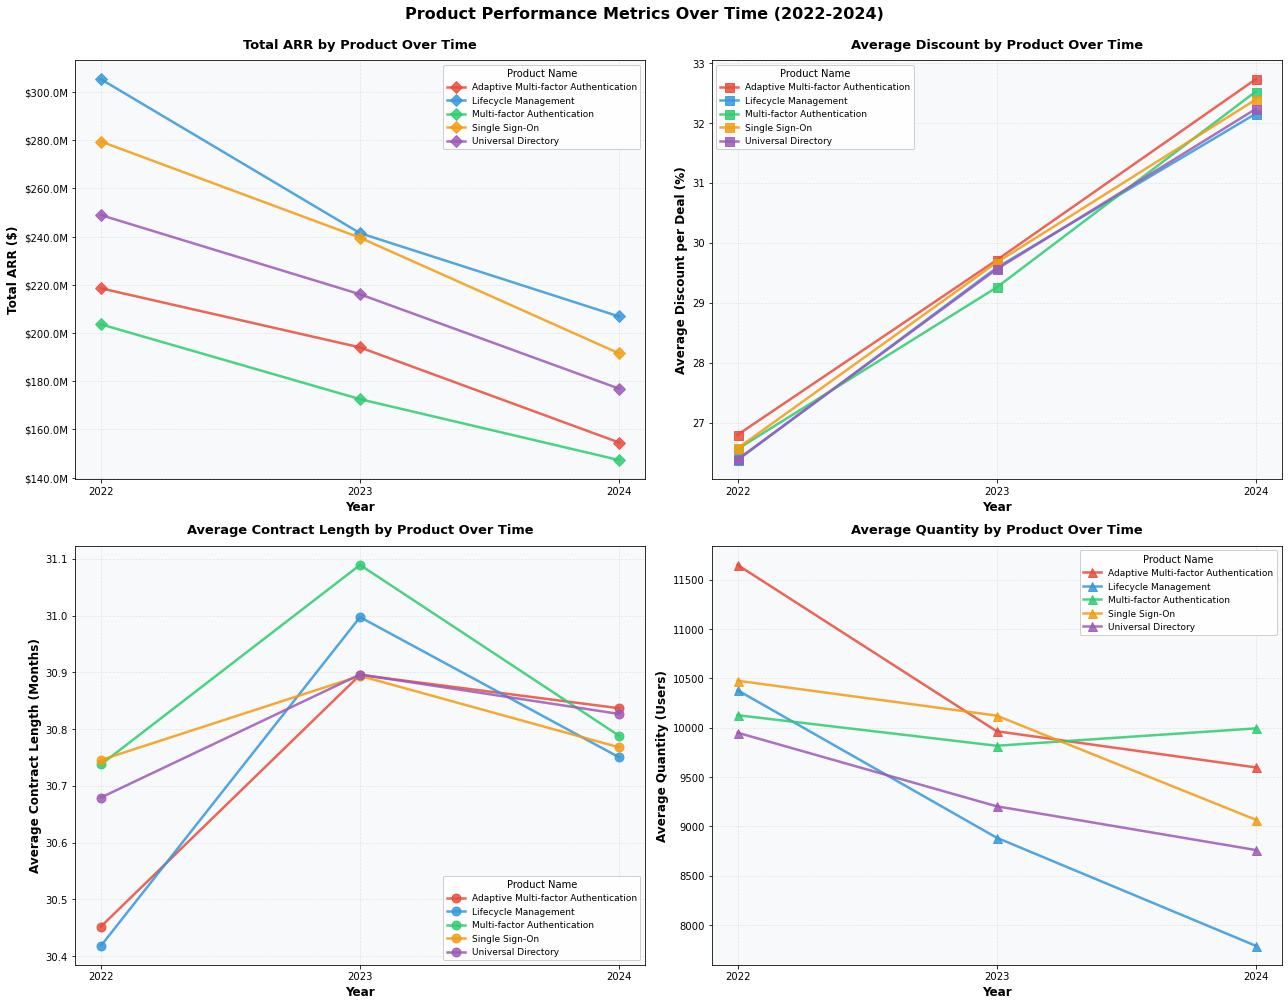

In [57]:
#Product basic charts
# Aggregate metrics by product and year
product_year_metrics = data.groupby(['Product Name', 'Year']).agg({
    'Contract Length': 'mean',
    'Discount_Percentage': 'mean',
    'ARR': 'sum',
    'Quantity': 'mean'
}).reset_index()

product_year_metrics.columns = ['Product Name', 'Year', 'Avg_Contract_Length', 
                                 'Avg_Discount_per_deal', 'Total_ARR', 'Avg_Quantity']

# Create 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Define color palette for products
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

# Get unique products and years
products = product_year_metrics['Product Name'].unique()
years = sorted(product_year_metrics['Year'].unique())

# Plot 1: Total ARR per Product per Year
for i, product in enumerate(products):
    product_data = product_year_metrics[product_year_metrics['Product Name'] == product]
    axes[0, 0].plot(product_data['Year'], product_data['Total_ARR'], 
                    marker='D', linewidth=2.5, markersize=9, 
                    label=product, color=colors[i], alpha=0.85)

axes[0, 0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Total ARR ($)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Total ARR by Product Over Time', fontsize=13, fontweight='bold', pad=12)
axes[0, 0].set_xticks(years)
axes[0, 0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
axes[0, 0].legend(title='Product Name', fontsize=9, title_fontsize=10, loc='best', framealpha=0.95)
axes[0, 0].grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
axes[0, 0].set_facecolor('#f8f9fa')

# Plot 2: Average Discount per Product per Year
for i, product in enumerate(products):
    product_data = product_year_metrics[product_year_metrics['Product Name'] == product]
    axes[0, 1].plot(product_data['Year'], product_data['Avg_Discount_per_deal'], 
                    marker='s', linewidth=2.5, markersize=9, 
                    label=product, color=colors[i], alpha=0.85)

axes[0, 1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Average Discount per Deal (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Average Discount by Product Over Time', fontsize=13, fontweight='bold', pad=12)
axes[0, 1].set_xticks(years)
axes[0, 1].legend(title='Product Name', fontsize=9, title_fontsize=10, loc='best', framealpha=0.95)
axes[0, 1].grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
axes[0, 1].set_facecolor('#f8f9fa')

# Plot 3: Average Contract Length per Product per Year
for i, product in enumerate(products):
    product_data = product_year_metrics[product_year_metrics['Product Name'] == product]
    axes[1, 0].plot(product_data['Year'], product_data['Avg_Contract_Length'], 
                    marker='o', linewidth=2.5, markersize=9, 
                    label=product, color=colors[i], alpha=0.85)

axes[1, 0].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Average Contract Length (Months)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Average Contract Length by Product Over Time', fontsize=13, fontweight='bold', pad=12)
axes[1, 0].set_xticks(years)
axes[1, 0].legend(title='Product Name', fontsize=9, title_fontsize=10, loc='best', framealpha=0.95)
axes[1, 0].grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
axes[1, 0].set_facecolor('#f8f9fa')

# Plot 4: Average Quantity per Product per Year
for i, product in enumerate(products):
    product_data = product_year_metrics[product_year_metrics['Product Name'] == product]
    axes[1, 1].plot(product_data['Year'], product_data['Avg_Quantity'], 
                    marker='^', linewidth=2.5, markersize=9, 
                    label=product, color=colors[i], alpha=0.85)

axes[1, 1].set_xlabel('Year', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Average Quantity (Users)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Average Quantity by Product Over Time', fontsize=13, fontweight='bold', pad=12)
axes[1, 1].set_xticks(years)
axes[1, 1].legend(title='Product Name', fontsize=9, title_fontsize=10, loc='best', framealpha=0.95)
axes[1, 1].grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
axes[1, 1].set_facecolor('#f8f9fa')

fig.patch.set_facecolor('white')
plt.suptitle('Product Performance Metrics Over Time (2022-2024)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


In [63]:
# Create summary table with YoY % change
summary_by_year = data.groupby('Year').agg({
    'ARR': 'sum',
    'Discount_Percentage': 'mean',
    'Contract Length': 'mean',
    'Deal ID': 'nunique'
}).reset_index()

summary_by_year.columns = ['Year', 'Total_ARR', 'Avg_Discount_%', 'Avg_Contract_Length', 'Num_Deals']

# Calculate YoY % change
summary_by_year['ARR_YoY_%'] = round(summary_by_year['Total_ARR'].pct_change() * 100, 2)
summary_by_year['Discount_YoY_%'] = round(summary_by_year['Avg_Discount_%'].pct_change() * 100, 2)
summary_by_year['Contract_Length_YoY_%'] = round(summary_by_year['Avg_Contract_Length'].pct_change() * 100, 2)
summary_by_year['Deals_YoY_%'] = round(summary_by_year['Num_Deals'].pct_change() * 100, 2)

# Create formatted display version
summary_display = summary_by_year.copy()

# Format columns
summary_display['Total_ARR'] = summary_display['Total_ARR'].apply(lambda x: f'${x/1e6:.2f}M')
summary_display['Avg_Discount_%'] = summary_display['Avg_Discount_%'].apply(lambda x: f'{x:.2f}%')
summary_display['Avg_Contract_Length'] = summary_display['Avg_Contract_Length'].apply(lambda x: f'{x:.2f}')
summary_display['ARR_YoY_%'] = summary_display['ARR_YoY_%'].apply(lambda x: f'{x:.2f}%' if pd.notna(x) else 'N/A')
summary_display['Discount_YoY_%'] = summary_display['Discount_YoY_%'].apply(lambda x: f'{x:.2f}%' if pd.notna(x) else 'N/A')
summary_display['Contract_Length_YoY_%'] = summary_display['Contract_Length_YoY_%'].apply(lambda x: f'{x:.2f}%' if pd.notna(x) else 'N/A')
summary_display['Deals_YoY_%'] = summary_display['Deals_YoY_%'].apply(lambda x: f'{x:.2f}%' if pd.notna(x) else 'N/A')

print("\n" + "="*120)
print("YEAR-OVER-YEAR SUMMARY")
print("="*120)

summary_display



YEAR-OVER-YEAR SUMMARY


,Year,Total_ARR,Avg_Discount_%,Avg_Contract_Length,Num_Deals,ARR_YoY_%,Discount_YoY_%,Contract_Length_YoY_%,Deals_YoY_%
0,2022,$1255.80M,26.51%,30.65,5188,N/A,N/A,N/A,N/A
1,2023,$1063.58M,29.57%,30.94,4956,-15.31%,11.54%,0.97%,-4.47%
2,2024,$877.05M,32.35%,30.79,4625,-17.54%,9.43%,-0.49%,-6.68%


### Insight - ARR has declined -30% since 2022 even though contract length has stayed flat 
- Deal volume is down -10% and discount has risen by +22% in the same time period
- Declining deal volume suggests increasing discount is not resulting in higher deal volume or ARR

### 2.2.2 ARR by Product Type

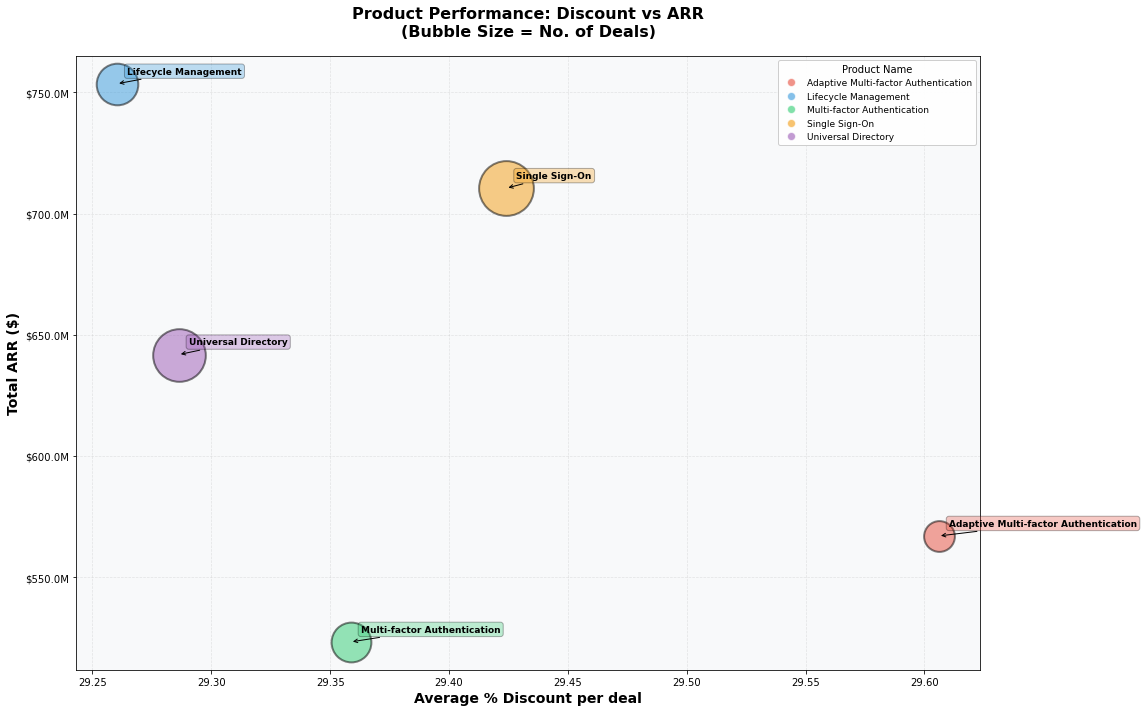


Bubble Chart Data Summary:
                           Product Name  Discount_Percentage        ARR  \
1                  Lifecycle Management                29.26  753584880   
3                        Single Sign-On                29.42  710521560   
4                   Universal Directory                29.29  641870880   
0  Adaptive Multi-factor Authentication                29.61  567075960   
2           Multi-factor Authentication                29.36  523379700   

   Deal ID  
1     6751  
3    12353  
4    11346  
0     3298  
2     6102  


In [49]:
# Prepare data for bubble chart
bubble_data = data.groupby('Product Name').agg({
    'Discount_Percentage': 'mean',
    'ARR': 'sum',
    'Deal ID': 'nunique'
}).reset_index()

# Create bubble chart
fig, ax = plt.subplots(figsize=(16, 10))

# Define color palette for products
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', 
          '#1abc9c', '#e67e22', '#95a5a6', '#16a085', '#d35400']

# Normalize bubble sizes to reasonable range (adjust the divisor for better sizing)
max_quantity = bubble_data['Deal ID'].max()
min_size = 200
max_size = 3000

# Create scatter plot (bubble chart)
for i, product in enumerate(bubble_data['Product Name']):
    product_row = bubble_data[bubble_data['Product Name'] == product]
    
    # Normalize bubble size
    normalized_size = min_size + (product_row['Deal ID'].values[0] / max_quantity) * (max_size - min_size)
    
    ax.scatter(product_row['Discount_Percentage'], 
               product_row['ARR'], 
               s=normalized_size,
               color=colors[i % len(colors)], 
               alpha=0.5, 
               edgecolors='black', 
               linewidth=2,
               label=product)

# Add product name labels with better positioning
for i, row in bubble_data.iterrows():
    ax.annotate(row['Product Name'], 
                xy=(row['Discount_Percentage'], row['ARR']),
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=9, 
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor=colors[i % len(colors)], alpha=0.3, edgecolor='black'),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=1))

# Styling
ax.set_xlabel('Average % Discount per deal', fontsize=14, fontweight='bold')
ax.set_ylabel('Total ARR ($)', fontsize=14, fontweight='bold')
ax.set_title('Product Performance: Discount vs ARR\n(Bubble Size = No. of Deals)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# Format Y-axis as currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Add background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Add legend with bubble size reference
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=product,
                         markerfacecolor=colors[i % len(colors)], markersize=8, alpha=0.6)
                  for i, product in enumerate(bubble_data['Product Name'])]
ax.legend(handles=legend_elements, title='Product Name', fontsize=9, 
          title_fontsize=10, loc='upper right', framealpha=0.95)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nBubble Chart Data Summary:")
print(bubble_data.sort_values('ARR', ascending=False).round(2))


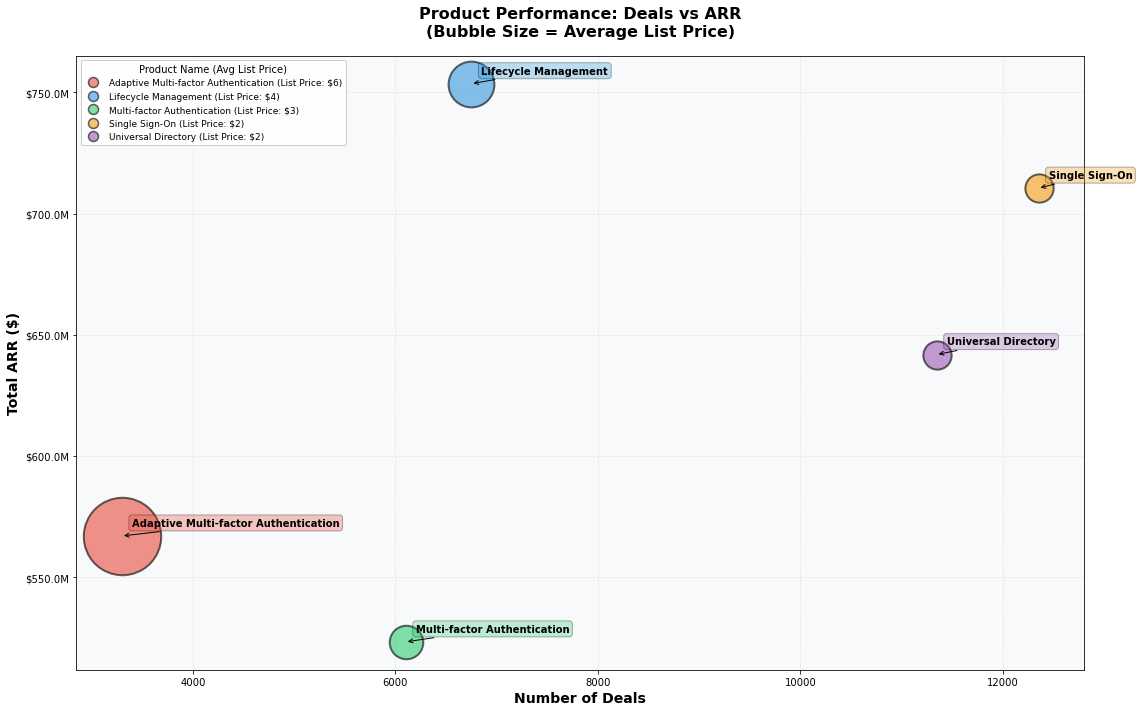


Bubble Chart Data Summary (sorted by List Price):
                           Product Name  Avg_Discount_Percentage  Total_ARR  \
0  Adaptive Multi-factor Authentication                    29.61  567075960   
1                  Lifecycle Management                    29.26  753584880   
2           Multi-factor Authentication                    29.36  523379700   
3                        Single Sign-On                    29.42  710521560   
4                   Universal Directory                    29.29  641870880   

   Num_Deals  Avg_List_Price  
0       3298             6.0  
1       6751             4.0  
2       6102             3.0  
3      12353             2.0  
4      11346             2.0  


In [ ]:
# Prepare data for bubble chart
bubble_data = data.groupby('Product Name').agg({
    'Discount_Percentage': 'mean',
    'ARR': 'sum',
    'Deal ID': 'nunique',
    'List Price': 'mean'
}).reset_index()

bubble_data.columns = ['Product Name', 'Avg_Discount_Percentage', 'Total_ARR', 'Num_Deals', 'Avg_List_Price']

# Create bubble chart
fig, ax = plt.subplots(figsize=(16, 10))

# Define color palette for products
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', 
          '#1abc9c', '#e67e22', '#95a5a6', '#16a085', '#d35400']

# Use SQUARED normalization for more prominent size differences
max_price = bubble_data['Avg_List_Price'].max()
min_price = bubble_data['Avg_List_Price'].min()
min_size = 800
max_size = 6000

# Create scatter plot (bubble chart)
for i, (idx, row) in enumerate(bubble_data.iterrows()):
    # Normalize bubble size with SQUARED scaling for more dramatic differences
    ratio = (row['Avg_List_Price'] - min_price) / (max_price - min_price)
    normalized_size = min_size + (ratio ** 2) * (max_size - min_size)
    
    ax.scatter(row['Num_Deals'], 
               row['Total_ARR'], 
               s=normalized_size,
               color=colors[i % len(colors)], 
               alpha=0.6, 
               edgecolors='black', 
               linewidth=2,
               label=row['Product Name'])

# Add product name labels with better positioning
for i, (idx, row) in enumerate(bubble_data.iterrows()):
    ax.annotate(row['Product Name'], 
                xy=(row['Num_Deals'], row['Total_ARR']),
                xytext=(10, 10), 
                textcoords='offset points',
                fontsize=10, 
                fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor=colors[i % len(colors)], 
                         alpha=0.3, edgecolor='black'),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=1))

# Styling
ax.set_xlabel('Number of Deals', fontsize=14, fontweight='bold')
ax.set_ylabel('Total ARR ($)', fontsize=14, fontweight='bold')
ax.set_title('Product Performance: Deals vs ARR\n(Bubble Size = List Price)', 
             fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# Format Y-axis as currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Add background color
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

# Add legend with bubble size reference
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                         label=f"{row['Product Name']} (List Price: ${row['Avg_List_Price']:.0f})",
                         markerfacecolor=colors[i % len(colors)], 
                         markersize=10, alpha=0.6, markeredgecolor='black', markeredgewidth=1.5)
                  for i, (idx, row) in enumerate(bubble_data.iterrows())]
ax.legend(handles=legend_elements, title='Product Name (Avg List Price)', 
          fontsize=9, title_fontsize=10, loc='upper left', framealpha=0.95)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nBubble Chart Data Summary (sorted by List Price):")
print(bubble_data.sort_values('Avg_List_Price', ascending=False).round(2))


### Insight - Lifecycle Management product should be priortized in deal offerings
Lifecycle Management is one of the highest revenue products account for 23.58% of ARR ($753M) even though it is part of less than half the deals. 
Lifecycle management is producing almost as much revenue as Single Sign on which is part of 83.6% of deals

Recommendation - Upsell Lifecycle management in as many deals as possible - it is a mid range product with high revenue potential
Adding Lifecycle management to even 5% more deals results (at similar discount rate) results in XM more in revenue

### 2.2.3 Discount % by Product Type

Product Metrics Summary:
                           Product Name  Total_Annualized_List_Price  \
0  Adaptive Multi-factor Authentication                 2.481084e+09   
1                  Lifecycle Management                 2.938848e+09   
2           Multi-factor Authentication                 2.192508e+09   
3                        Single Sign-On                 2.940504e+09   
4                   Universal Directory                 2.539656e+09   

   Total_ARR  Avg_Discount_Percentage  Effective_Discount_Rate  
0  567075960                    29.61                    77.14  
1  753584880                    29.26                    74.36  
2  523379700                    29.36                    76.13  
3  710521560                    29.42                    75.84  
4  641870880                    29.29                    74.73  




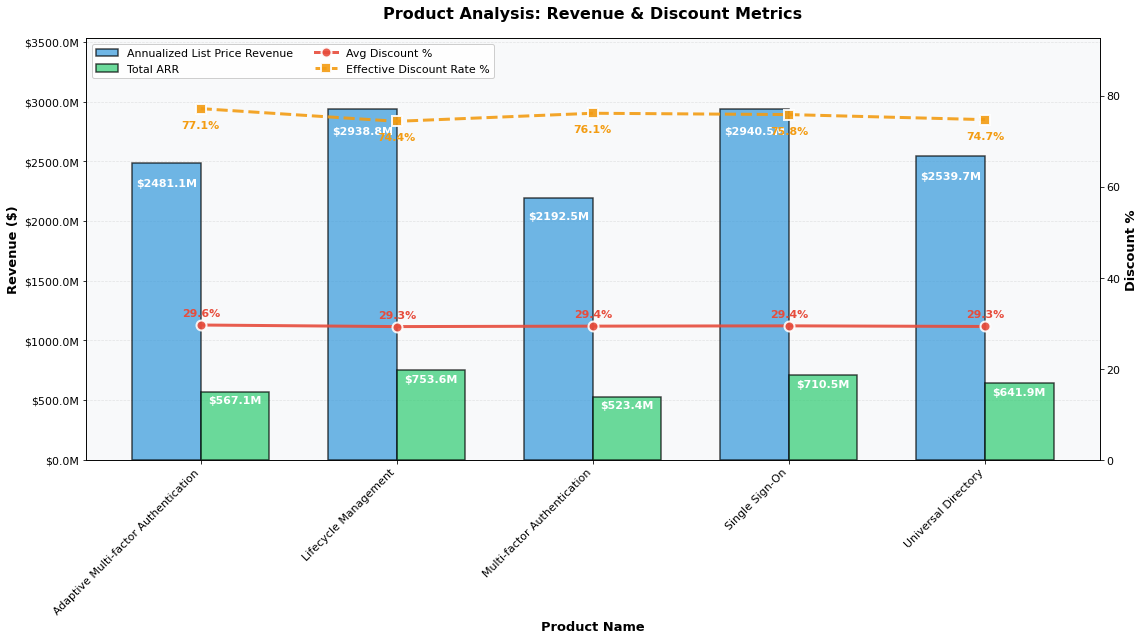

In [65]:
# Calculate metrics per product type
product_metrics = data.groupby('Product Name').agg({
    'Annualized_List_Price': 'sum',
    'ARR': 'sum',
    'Discount_Percentage': 'mean'
}).reset_index()

# Calculate Effective Discount Rate
product_metrics['Effective_Discount_Rate'] = (
    (product_metrics['Annualized_List_Price'] - product_metrics['ARR']) / 
    product_metrics['Annualized_List_Price']
) * 100

product_metrics.columns = ['Product Name', 'Total_Annualized_List_Price', 'Total_ARR', 
                           'Avg_Discount_Percentage', 'Effective_Discount_Rate']

print("Product Metrics Summary:")
print(product_metrics.round(2))
print("\n")

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(16, 9))

# Define colors
bar_colors = ['#3498db', '#2ecc71']  # Blue for List Price, Green for ARR
line_colors = ['#e74c3c', '#f39c12']  # Red for Avg Discount, Orange for Effective Discount

# X-axis positions
x = np.arange(len(product_metrics))
width = 0.35

# Plot bars for revenue (left y-axis)
bars1 = ax1.bar(x - width/2, product_metrics['Total_Annualized_List_Price'], 
                width, label='Annualized List Price Revenue', 
                color=bar_colors[0], alpha=0.7, edgecolor='black', linewidth=1.5)
bars2 = ax1.bar(x + width/2, product_metrics['Total_ARR'], 
                width, label='Total ARR', 
                color=bar_colors[1], alpha=0.7, edgecolor='black', linewidth=1.5)

# Add value labels on bars (inside at the top)
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height * 0.95,
            f'${height/1e6:.1f}M',
            ha='center', va='top', fontsize=11, fontweight='bold', color='white')

for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height * 0.95,
            f'${height/1e6:.1f}M',
            ha='center', va='top', fontsize=11, fontweight='bold', color='white')

# Styling for ax1 (bars - left y-axis)
ax1.set_xlabel('Product Name', fontsize=13, fontweight='bold')
ax1.set_ylabel('Revenue ($)', fontsize=13, fontweight='bold', color='black')
ax1.set_xticks(x)
ax1.set_xticklabels(product_metrics['Product Name'], rotation=45, ha='right', fontsize=11)
ax1.tick_params(axis='y', labelcolor='black', labelsize=11)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Increase y-axis limit to prevent legend overlap
max_revenue = max(product_metrics['Total_Annualized_List_Price'].max(), 
                  product_metrics['Total_ARR'].max())
ax1.set_ylim(0, max_revenue * 1.2)

ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.7, axis='y')
ax1.set_axisbelow(True)
ax1.set_facecolor('#f8f9fa')

# Create secondary y-axis for discount percentages (right y-axis)
ax2 = ax1.twinx()

# Plot lines for discount percentages on secondary axis
line1 = ax2.plot(x, product_metrics['Avg_Discount_Percentage'], 
                 marker='o', linewidth=3, markersize=10, linestyle='-',
                 color=line_colors[0], alpha=0.9, markeredgecolor='white', 
                 markeredgewidth=2, label='Avg Discount %', zorder=5)

line2 = ax2.plot(x, product_metrics['Effective_Discount_Rate'], 
                 marker='s', linewidth=3, markersize=10, linestyle='--',
                 color=line_colors[1], alpha=0.9, markeredgecolor='white', 
                 markeredgewidth=2, label='Effective Discount Rate %', zorder=5)

# Add value labels on line points (1 decimal point, larger font)
for i, (xpos, y) in enumerate(zip(x, product_metrics['Avg_Discount_Percentage'])):
    ax2.text(xpos, y + 1.5, f'{y:.1f}%', ha='center', va='bottom', 
            fontsize=11, fontweight='bold', color=line_colors[0])

for i, (xpos, y) in enumerate(zip(x, product_metrics['Effective_Discount_Rate'])):
    ax2.text(xpos, y - 2.5, f'{y:.1f}%', ha='center', va='top', 
            fontsize=11, fontweight='bold', color=line_colors[1])

# Styling for ax2 (lines - right y-axis)
ax2.set_ylabel('Discount %', fontsize=13, fontweight='bold', color='black')
ax2.tick_params(axis='y', labelcolor='black', labelsize=11)
ax2.set_ylim(0, max(product_metrics['Avg_Discount_Percentage'].max(), 
                    product_metrics['Effective_Discount_Rate'].max()) * 1.2)

# Title
plt.title('Product Analysis: Revenue & Discount Metrics', 
          fontsize=16, fontweight='bold', pad=20)

# Combine legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, 
          fontsize=11, loc='upper left', framealpha=0.95, ncol=2)

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()


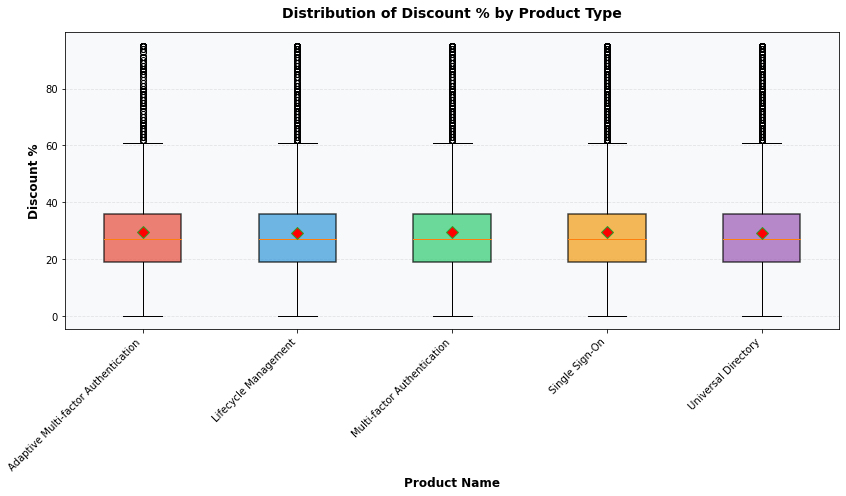


Discount Statistics by Product:
                                        count   mean    std  min   25%   50%  \
Product Name                                                                   
Adaptive Multi-factor Authentication   3298.0  29.61  15.88  0.0  19.0  27.0   
Lifecycle Management                   6751.0  29.26  15.40  0.0  19.0  27.0   
Multi-factor Authentication            6102.0  29.36  15.65  0.0  19.0  27.0   
Single Sign-On                        12353.0  29.42  15.66  0.0  19.0  27.0   
Universal Directory                   11346.0  29.29  15.48  0.0  19.0  27.0   

                                       75%   max  
Product Name                                      
Adaptive Multi-factor Authentication  36.0  95.0  
Lifecycle Management                  36.0  95.0  
Multi-factor Authentication           36.0  95.0  
Single Sign-On                        36.0  95.0  
Universal Directory                   36.0  95.0  


In [23]:
# Boxplot of Discount Percentage by Product Type
plt.figure(figsize=(12, 7))

# Create boxplot
box_plot = plt.boxplot([data[data['Product Name'] == product]['Discount_Percentage'].values 
                        for product in sorted(data['Product Name'].unique())],
                       labels=sorted(data['Product Name'].unique()),
                       patch_artist=True,
                       showmeans=True,
                       meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

# Color the boxes
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

plt.xlabel('Product Name', fontsize=12, fontweight='bold')
plt.ylabel('Discount %', fontsize=12, fontweight='bold')
plt.title('Distribution of Discount % by Product Type', fontsize=14, fontweight='bold', pad=15)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.gca().set_facecolor('#f8f9fa')
plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nDiscount Statistics by Product:")
print(data.groupby('Product Name')['Discount_Percentage'].describe().round(2))


Summary by Discount Bin:
  Discount_Bin  Num_Deals  Total_Annualized_List_Price
0        0-25%       6723                 5.544960e+08
1       25-35%       4273                 7.781280e+08
2       35-50%       2696                 1.183986e+09
3       50-75%        686                 2.277990e+09
4         75%+        391                 8.298000e+09




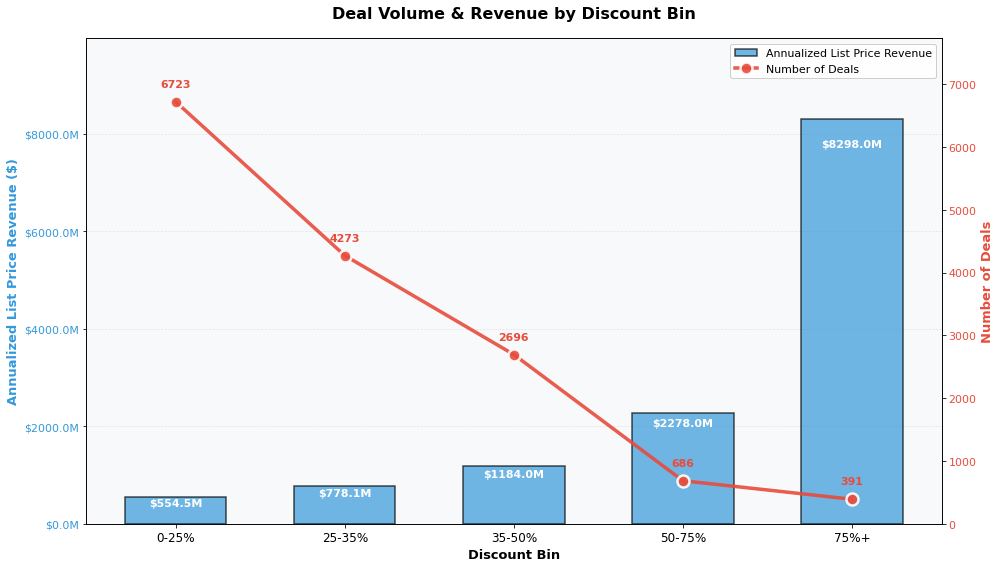


SUMMARY TABLE
Discount_Bin  Num_Deals Total_Annualized_List_Price
       0-25%       6723                    $554.50M
      25-35%       4273                    $778.13M
      35-50%       2696                   $1183.99M
      50-75%        686                   $2277.99M
        75%+        391                   $8298.00M


In [ ]:
# Create discount bins
discount_bins = [0, 25, 35, 50, 75, 100]
bin_labels = ['0-25%', '25-35%', '35-50%', '50-75%', '75%+']

# Create a new column for discount bins if not already created
if 'Discount_Bin' not in data.columns:
    data['Discount_Bin'] = pd.cut(data['Discount_Percentage'], bins=discount_bins, labels=bin_labels, include_lowest=True)

# Aggregate metrics by discount bin (across all products)
discount_bin_summary = data.groupby('Discount_Bin').agg({
    'Deal ID': 'nunique',
    'Annualized_List_Price': 'sum'
}).reset_index()

discount_bin_summary.columns = ['Discount_Bin', 'Num_Deals', 'Total_Annualized_List_Price']

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Define colors
bar_color = '#3498db'
line_color = '#e74c3c'

# X positions
x = np.arange(len(discount_bin_summary))
width = 0.6

# Bar chart for Annualized List Price Revenue (left y-axis)
bars = ax1.bar(x, discount_bin_summary['Total_Annualized_List_Price'], 
               width, color=bar_color, alpha=0.7, edgecolor='black', linewidth=1.5,
               label='Annualized List Price Revenue')

# Add value labels inside bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height * 0.95,
            f'${height/1e6:.1f}M',
            ha='center', va='top', fontsize=11, fontweight='bold', color='white')

# Styling for ax1 (bars - left y-axis)
ax1.set_xlabel('Discount Bin', fontsize=13, fontweight='bold')
ax1.set_ylabel('Annualized List Price Revenue ($)', fontsize=13, fontweight='bold', color=bar_color)
ax1.set_xticks(x)
ax1.set_xticklabels(discount_bin_summary['Discount_Bin'], fontsize=12)
ax1.tick_params(axis='y', labelcolor=bar_color, labelsize=11)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Increase y-axis limit to prevent overlap
max_revenue = discount_bin_summary['Total_Annualized_List_Price'].max()
ax1.set_ylim(0, max_revenue * 1.2)

ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.7, axis='y')
ax1.set_axisbelow(True)
ax1.set_facecolor('#f8f9fa')

# Create secondary y-axis for line chart (right y-axis)
ax2 = ax1.twinx()

# Line chart for Number of Deals (right y-axis)
line = ax2.plot(x, discount_bin_summary['Num_Deals'], 
                marker='o', linewidth=3.5, markersize=12, linestyle='-',
                color=line_color, alpha=0.9, markeredgecolor='white', 
                markeredgewidth=2.5, label='Number of Deals', zorder=5)

# Add value labels on line points
for i, (xpos, y) in enumerate(zip(x, discount_bin_summary['Num_Deals'])):
    ax2.text(xpos, y + max(discount_bin_summary['Num_Deals'])*0.03, 
            f'{int(y)}', ha='center', va='bottom', 
            fontsize=11, fontweight='bold', color=line_color)

# Styling for ax2 (line - right y-axis)
ax2.set_ylabel('Number of Deals', fontsize=13, fontweight='bold', color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color, labelsize=11)
ax2.set_ylim(0, max(discount_bin_summary['Num_Deals']) * 1.15)

# Title
plt.title('Deal Volume & Revenue by Discount Bin', 
          fontsize=16, fontweight='bold', pad=20)

# Combined legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, 
          fontsize=11, loc='upper right', framealpha=0.95)

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

# Print formatted summary table
print("\n" + "="*80)
print("SUMMARY TABLE")
print("="*80)

summary_display = discount_bin_summary.copy()
summary_display['Total_Annualized_List_Price'] = summary_display['Total_Annualized_List_Price'].apply(lambda x: f'${x/1e6:.2f}M')
print(summary_display.to_string(index=False))


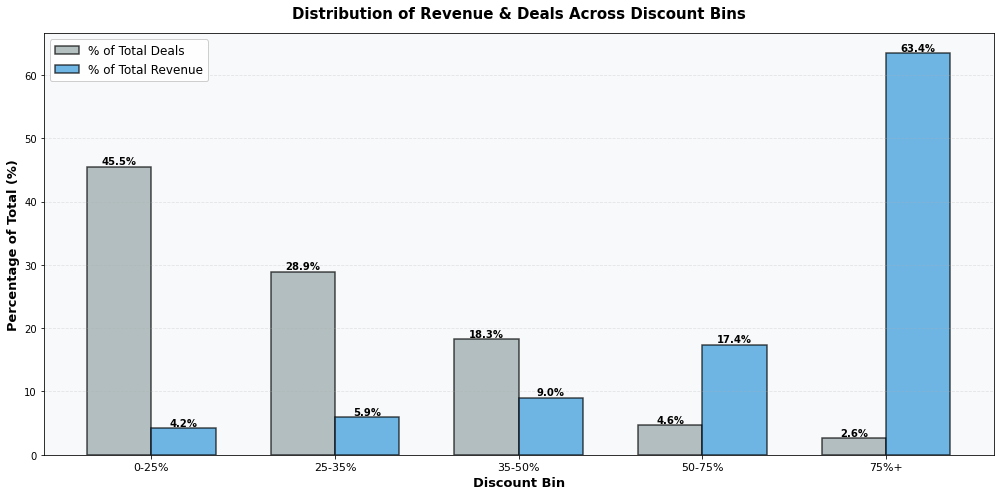

In [74]:
# Calculate percentage of total for each metric
discount_bin_summary['Revenue_Pct'] = (discount_bin_summary['Total_Annualized_List_Price'] / 
                                       discount_bin_summary['Total_Annualized_List_Price'].sum()) * 100
discount_bin_summary['Deals_Pct'] = (discount_bin_summary['Num_Deals'] / 
                                     discount_bin_summary['Num_Deals'].sum()) * 100

# Create comparison chart
fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(discount_bin_summary))
width = 0.35

# Swap positions: Deals on left, Revenue on right
bars1 = ax.bar(x - width/2, discount_bin_summary['Deals_Pct'], width,
               label='% of Total Deals', color='#95a5a6', alpha=0.7, edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, discount_bin_summary['Revenue_Pct'], width,
               label='% of Total Revenue', color='#3498db', alpha=0.7, edgecolor='black', linewidth=1.5)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.set_xlabel('Discount Bin', fontsize=13, fontweight='bold')
ax.set_ylabel('Percentage of Total (%)', fontsize=13, fontweight='bold')
ax.set_title('Distribution of Revenue & Deals Across Discount Bins', fontsize=15, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(discount_bin_summary['Discount_Bin'], fontsize=11)
ax.legend(fontsize=12, loc='upper left', framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--', axis='y')
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()


### Insight - 7.2% of deals account for 80.8% of Revenue and have the steepest discounts >50%
- 2.6% of deals account account for 63% of ARR have >75% of discount

### 2.2.4 Discount Capping Analysis

Recommendation
- Concentrate on improving discount rate for high volume clients
- Increasing discount rate for top 7% of clients can bring in revenue of $3,760M in additional revenue

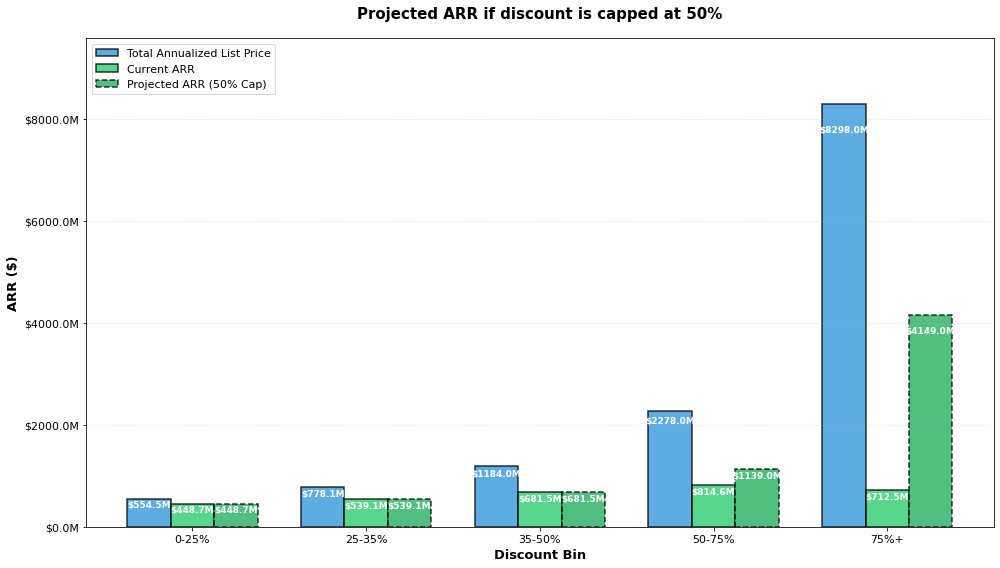

In [99]:
discount_bin_summary = data.groupby('Discount_Bin').agg({
    'Deal ID': 'nunique',
    'Annualized_List_Price': 'sum',
    'ARR':'sum'
}).reset_index()

discount_bin_summary.columns = ['Discount_Bin', 'Num_Deals', 'Total_Annualized_List_Price', 'Current_ARR']

# Capping Discount percentage at 50% - use apply with lambda for element-wise max
discount_bin_summary['Projected_ARR'] = discount_bin_summary.apply(
    lambda row: max(row['Current_ARR'], row['Total_Annualized_List_Price'] * 0.5), axis=1
)

# Create the bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Set up x positions for grouped bars
x = np.arange(len(discount_bin_summary))
width = 0.25

# Create bars
bars1 = ax.bar(x - width, discount_bin_summary['Total_Annualized_List_Price'], 
               width, label='Total Annualized List Price', color='#3498db', 
               alpha=0.8, edgecolor='black', linewidth=1.5)

bars2 = ax.bar(x, discount_bin_summary['Current_ARR'], 
               width, label='Current ARR', color='#2ecc71', 
               alpha=0.8, edgecolor='black', linewidth=1.5)

bars3 = ax.bar(x + width, discount_bin_summary['Projected_ARR'], 
               width, label='Projected ARR (50% Cap)', color='#27ae60', 
               alpha=0.8, edgecolor='black', linewidth=1.5, linestyle='--')

# Add value labels on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height * 0.95,
                f'${height/1e6:.1f}M',
                ha='center', va='top', fontsize=9, fontweight='bold', color='white')

# Customize the chart
ax.set_xlabel('Discount Bin', fontsize=13, fontweight='bold')
ax.set_ylabel('ARR ($)', fontsize=13, fontweight='bold')
ax.set_title('Projected ARR if discount is capped at 50%', fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(discount_bin_summary['Discount_Bin'], fontsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.legend(fontsize=11, loc='upper left')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Format y-axis as currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Increase y-axis limit to accommodate labels
ax.set_ylim(0, ax.get_ylim()[1] * 1.1)

plt.tight_layout()
plt.show()


In [103]:
summary_display = discount_bin_summary.copy()
summary_display['Total_Annualized_List_Price'] = summary_display['Total_Annualized_List_Price'].apply(lambda x: f'${x/1e6:.2f}M')
summary_display['Current_ARR'] = summary_display['Current_ARR'].apply(lambda x: f'${x/1e6:.2f}M')
summary_display['Projected_ARR'] = summary_display['Projected_ARR'].apply(lambda x: f'${x/1e6:.2f}M')
summary_display

,Discount_Bin,Num_Deals,Total_Annualized_List_Price,Current_ARR,Projected_ARR
0,0-25%,6723,$554.50M,$448.69M,$448.69M
1,25-35%,4273,$778.13M,$539.07M,$539.07M
2,35-50%,2696,$1183.99M,$681.52M,$681.52M
3,50-75%,686,$2277.99M,$814.61M,$1138.99M
4,75%+,391,$8298.00M,$712.54M,$4149.00M


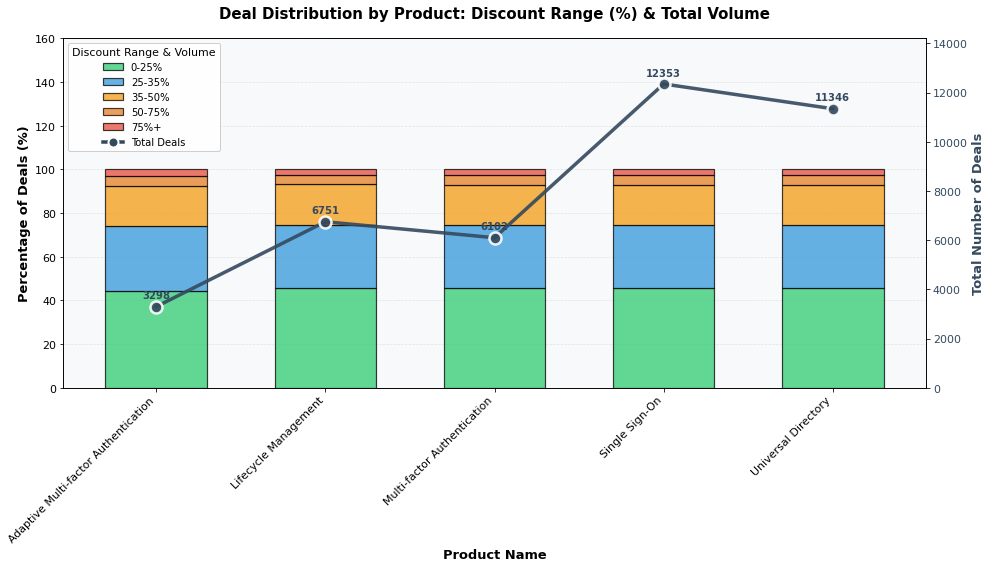


SUMMARY

Percentage Distribution:
Discount_Bin                          0-25%  25-35%  35-50%  50-75%  75%+
Product Name                                                             
Adaptive Multi-factor Authentication   44.5    29.4    18.6     4.6   2.8
Lifecycle Management                   45.6    29.0    18.5     4.5   2.4
Multi-factor Authentication            45.9    28.8    18.0     4.5   2.7
Single Sign-On                         45.6    29.0    18.1     4.7   2.7
Universal Directory                    45.9    28.5    18.5     4.6   2.5

Total Deal Volume:
Product Name
Adaptive Multi-factor Authentication     3298
Lifecycle Management                     6751
Multi-factor Authentication              6102
Single Sign-On                          12353
Universal Directory                     11346
dtype: int64


In [73]:
# Create discount bins and count deals per product per bin
discount_bins = [0, 25, 35, 50, 75, 100]
bin_labels = ['0-25%', '25-35%', '35-50%', '50-75%', '75%+']

# Create a new column for discount bins
data['Discount_Bin'] = pd.cut(data['Discount_Percentage'], bins=discount_bins, labels=bin_labels, include_lowest=True)

# Count unique deals per product per discount bin
deals_by_bin = data.groupby(['Product Name', 'Discount_Bin'])['Deal ID'].nunique().unstack(fill_value=0)

# Calculate percentages
deals_by_bin_pct = deals_by_bin.div(deals_by_bin.sum(axis=1), axis=0) * 100

# Calculate total deals per product
total_deals_per_product = deals_by_bin.sum(axis=1)

# Create figure with dual y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Define colors for each discount bin
bin_colors = ['#2ecc71', '#3498db', '#f39c12', '#e67e22', '#e74c3c']

# Create percentage stacked bar chart on primary axis (left y-axis)
deals_by_bin_pct.plot(kind='bar', stacked=True, ax=ax1, color=bin_colors, 
                      edgecolor='black', linewidth=1.2, alpha=0.75, width=0.6)

# Styling for ax1 (bars - left y-axis)
ax1.set_xlabel('Product Name', fontsize=13, fontweight='bold')
ax1.set_ylabel('Percentage of Deals (%)', fontsize=13, fontweight='bold', color='black')
ax1.set_xticklabels(deals_by_bin_pct.index, rotation=45, ha='right', fontsize=11)
ax1.tick_params(axis='y', labelcolor='black', labelsize=11)
ax1.set_ylim(0, 160)
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.7, axis='y')
ax1.set_axisbelow(True)
ax1.set_facecolor('#f8f9fa')

# Create secondary y-axis for line chart (right y-axis)
ax2 = ax1.twinx()

# Plot line chart for total deal volume on secondary axis
x_positions = range(len(total_deals_per_product))
ax2.plot(x_positions, total_deals_per_product.values, 
         marker='o', linewidth=3.5, markersize=12, linestyle='-',
         color='#34495e', alpha=0.9, markeredgecolor='white', markeredgewidth=2.5,
         label='Total Deals', zorder=5)

# Add value labels on the line
for i, (x, y) in enumerate(zip(x_positions, total_deals_per_product.values)):
    ax2.text(x, y + max(total_deals_per_product)*0.02, f'{int(y)}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='#34495e')

# Styling for ax2 (line - right y-axis)
ax2.set_ylabel('Total Number of Deals', fontsize=13, fontweight='bold', color='#34495e')
ax2.tick_params(axis='y', labelcolor='#34495e', labelsize=11)
ax2.set_ylim(0, max(total_deals_per_product) * 1.15)  # Add padding at top

# Title
plt.title('Deal Distribution by Product: Discount Range (%) & Total Volume', 
          fontsize=15, fontweight='bold', pad=20)

# Combine legends
from matplotlib.lines import Line2D
handles1, labels1 = ax1.get_legend_handles_labels()
line_legend = Line2D([0], [0], color='#34495e', linewidth=3.5, marker='o', 
                     markersize=10, label='Total Deals', markeredgecolor='white', markeredgewidth=2)
handles1.append(line_legend)
labels1.append('Total Deals')

ax1.legend(handles1, labels1, title='Discount Range & Volume', 
          fontsize=10, title_fontsize=11, loc='upper left', framealpha=0.95)

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*80)
print("SUMMARY")
print("="*80)
print("\nPercentage Distribution:")
print(deals_by_bin_pct.round(1))
print("\nTotal Deal Volume:")
print(total_deals_per_product)


### 2.2.5 - Discount Trends by Sales Segment

Chart 1: Discount Heatmap by Region and Sales Segment


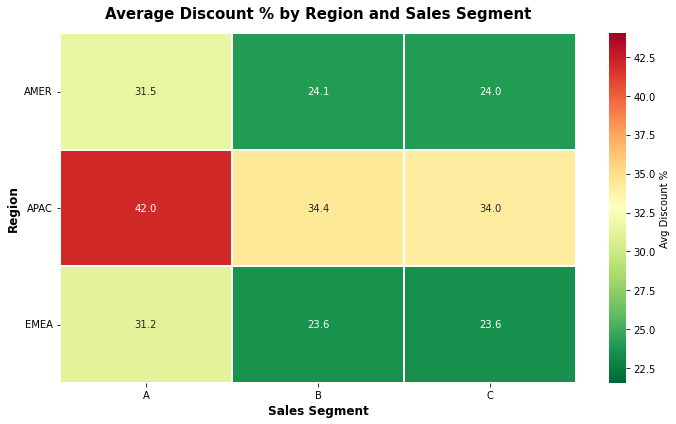

Sales Segment      A      B      C
Region                            
AMER           31.49  24.07  24.03
APAC           42.00  34.38  34.02
EMEA           31.18  23.62  23.57


In [18]:
# 1. HEATMAP: Discount Percentage by Region and Sales Segment
print("Chart 1: Discount Heatmap by Region and Sales Segment")
print("="*80)

# Calculate average discount by region and sales segment
heatmap_data = data.groupby(['Region', 'Sales Segment'])['Discount_Percentage'].mean().unstack()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn_r', 
            linewidths=2, linecolor='white', cbar_kws={'label': 'Avg Discount %'},
            vmin=heatmap_data.min().min()-2, vmax=heatmap_data.max().max()+2)
plt.title('Average Discount % by Region and Sales Segment', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('Sales Segment', fontsize=12, fontweight='bold')
plt.ylabel('Region', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(heatmap_data.round(2))



Chart 2: ARR Growth by Region Over Time (Stacked Area)


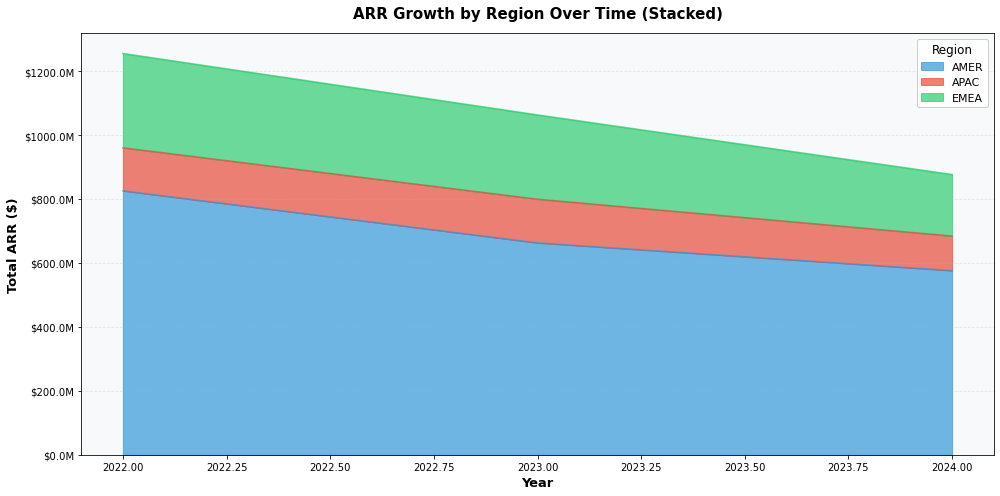


ARR by Region and Year:
Region       AMER       APAC       EMEA
Year                                   
2022    826119540  134549520  295127580
2023    663168180  136675140  263740080
2024    576387000  108118020  192547920


In [102]:
# 2. AREA CHART: ARR Growth by Region Over Time
print("\nChart 2: ARR Growth by Region Over Time (Stacked Area)")
print("="*80)

# Calculate ARR by region and year
region_year_arr = data.groupby(['Year', 'Region'])['ARR'].sum().unstack(fill_value=0)

# Create stacked area chart
fig, ax = plt.subplots(figsize=(14, 7))
region_year_arr.plot(kind='area', stacked=True, ax=ax, 
                     color=['#3498db', '#e74c3c', '#2ecc71'], alpha=0.7)

ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('Total ARR ($)', fontsize=13, fontweight='bold')
ax.set_title('ARR Growth by Region Over Time (Stacked)', fontsize=15, fontweight='bold', pad=15)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
ax.legend(title='Region', fontsize=11, title_fontsize=12, loc='upper right', framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--', axis='y')
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

print("\nARR by Region and Year:")
print(region_year_arr)


### Insight - APAC region has deepest discount and lowest deal volume and ARR

- Mainly due to deep discounts by Sales segment A
- Sales Segment A has deepest discounts across all regions. Discounts have especially increased in 2024 and that has not resulted in additional deals or more revenue

Recommendation - Concentrate on increasing deal value in APAC especially for sales segment A. 
Decreasing Sales segment A discount from 42% --> 31% in APAC will bring in Y revenue



### 2.2.5 Extra Charts


Chart 4: ARR Distribution by Region and Product (Nested Pie)


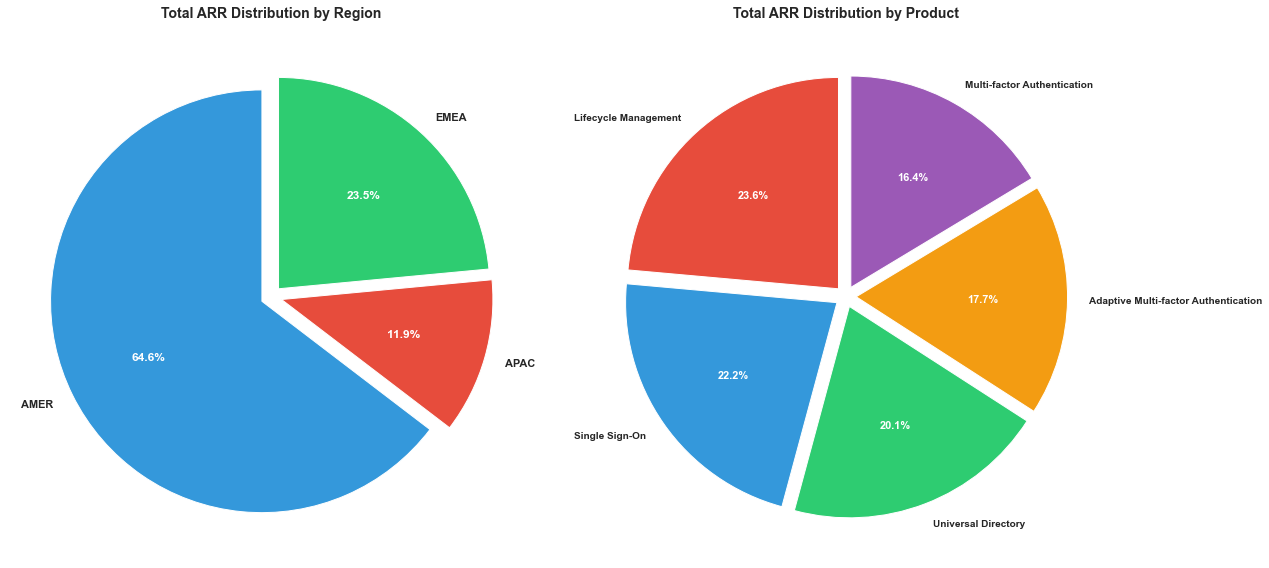


ARR by Region:
Region
AMER    $2,065,674,720
APAC      $379,342,680
EMEA      $751,415,580
Name: ARR, dtype: object

ARR by Product:
Product Name
Lifecycle Management                    $753,584,880
Single Sign-On                          $710,521,560
Universal Directory                     $641,870,880
Adaptive Multi-factor Authentication    $567,075,960
Multi-factor Authentication             $523,379,700
Name: ARR, dtype: object


In [31]:
# 4. SUNBURST-STYLE PIE CHART: ARR Distribution by Region and Product
print("\nChart 4: ARR Distribution by Region and Product (Nested Pie)")
print("="*80)

# Calculate ARR by region and product
region_product_arr = data.groupby(['Region', 'Product Name'])['ARR'].sum()

# Outer ring: by Region
region_arr = data.groupby('Region')['ARR'].sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Pie 1: ARR by Region
colors_region = ['#3498db', '#e74c3c', '#2ecc71']
wedges1, texts1, autotexts1 = ax1.pie(region_arr, labels=region_arr.index, autopct='%1.1f%%',
                                       colors=colors_region, startangle=90,
                                       textprops={'fontsize': 11, 'fontweight': 'bold'},
                                       explode=[0.05]*len(region_arr))

for autotext in autotexts1:
    autotext.set_color('white')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

ax1.set_title('Total ARR Distribution by Region', fontsize=14, fontweight='bold', pad=15)

# Pie 2: ARR by Product
product_arr = data.groupby('Product Name')['ARR'].sum().sort_values(ascending=False)
colors_product = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']
wedges2, texts2, autotexts2 = ax2.pie(product_arr, labels=product_arr.index, autopct='%1.1f%%',
                                       colors=colors_product, startangle=90,
                                       textprops={'fontsize': 10, 'fontweight': 'bold'},
                                       explode=[0.05]*len(product_arr))

for autotext in autotexts2:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

ax2.set_title('Total ARR Distribution by Product', fontsize=14, fontweight='bold', pad=15)

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

print("\nARR by Region:")
print(region_arr.apply(lambda x: f'${x:,.0f}'))
print("\nARR by Product:")
print(product_arr.apply(lambda x: f'${x:,.0f}'))



Chart 6: Discount vs Quantity - Deal Size Impact


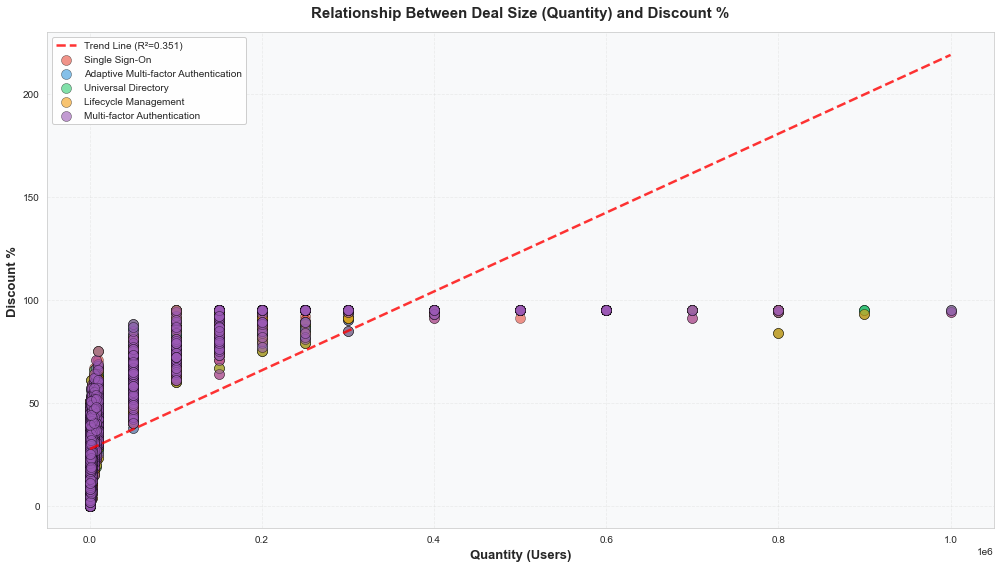


Correlation between Quantity and Discount: 0.592


In [33]:
# 6. SCATTER PLOT: Discount vs Quantity (Deal Size Impact)
print("\nChart 6: Discount vs Quantity - Deal Size Impact")
print("="*80)

fig, ax = plt.subplots(figsize=(14, 8))

# Create scatter plot colored by product
products = data['Product Name'].unique()
colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

for i, product in enumerate(products):
    product_data = data[data['Product Name'] == product]
    ax.scatter(product_data['Quantity'], product_data['Discount_Percentage'],
              s=100, alpha=0.6, color=colors[i], edgecolors='black', linewidth=0.5,
              label=product)

# Add trend line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(data['Quantity'], data['Discount_Percentage'])
x_trend = np.linspace(data['Quantity'].min(), data['Quantity'].max(), 100)
y_trend = slope * x_trend + intercept
ax.plot(x_trend, y_trend, 'r--', linewidth=2.5, alpha=0.8, 
        label=f'Trend Line (R²={r_value**2:.3f})')

ax.set_xlabel('Quantity (Users)', fontsize=13, fontweight='bold')
ax.set_ylabel('Discount %', fontsize=13, fontweight='bold')
ax.set_title('Relationship Between Deal Size (Quantity) and Discount %', 
            fontsize=15, fontweight='bold', pad=15)
ax.legend(fontsize=10, loc='best', framealpha=0.95)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_facecolor('#f8f9fa')
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

print(f"\nCorrelation between Quantity and Discount: {data[['Quantity', 'Discount_Percentage']].corr().iloc[0,1]:.3f}")


# 3. Linear Regression

### 3.1 Prepare Data

In [106]:
# Prepare data for linear regression model to predict discount percentage per deal

# First, aggregate data at the deal level (one discount per deal)
deal_level_data = data.groupby('Deal ID').agg({
    'Year': 'first',
    'Region': 'first',
    'Sales Segment': 'first',
    'Contract Length': 'first',
    'Discount_Percentage': 'mean',  # Average discount across products in the deal
    'Quantity': 'mean',  # No of users per customer in deal
    'List Price': 'mean',  # Average list price in the deal
    'Total List Price': 'sum',  # Total list price for the deal
}).reset_index()

# Create binary flags for each product per deal
product_flag_data = pd.get_dummies(data[['Deal ID', 'Product Name']], columns=['Product Name'], dtype=int)

# Group by Deal ID to get one row per deal (aggregate the dummy variables)
product_flag_data = product_flag_data.groupby('Deal ID').max().reset_index()

# Join product flags to deal-level data
deal_level_data = deal_level_data.merge(product_flag_data, on='Deal ID', how='left')

print("Deal-Level Data with Product Flags:")
print(f"Total Deals: {len(deal_level_data)}")
deal_level_data.head()

Deal-Level Data with Product Flags:
Total Deals: 14769


,Deal ID,Year,Region,Sales Segment,Contract Length,Discount_Percentage,Quantity,List Price,Total List Price,Product Name_Adaptive Multi-factor Authentication,Product Name_Lifecycle Management,Product Name_Multi-factor Authentication,Product Name_Single Sign-On,Product Name_Universal Directory
0,0011LYHVAURRAGZP,2024,AMER,A,36,35.0,1000.0,2.750000,396000,0,1,1,1,1
1,00163VHH30WYN4JY,2022,AMER,C,36,31.0,2500.0,4.000000,720000,1,0,0,1,0
2,004YLID3WUAUI08F,2022,AMER,A,12,30.0,1000.0,2.666667,96000,0,1,0,1,1
3,0094RE9EL8OIZ6ED,2022,AMER,A,36,23.0,500.0,2.750000,198000,0,1,1,1,1
4,00ADHPCYR6S1PKDA,2024,EMEA,A,36,37.0,500.0,2.500000,90000,0,0,1,0,1


### 3.2 Pre-processing

In [107]:
# Build Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Prepare features and target
# Convert categorical variables to dummy variables
deal_model_data = deal_level_data.copy()

# Create dummy variables for categorical features
deal_model_data = pd.get_dummies(deal_model_data, columns=['Region', 'Sales Segment'], 
                                  drop_first=True, dtype=int)

# Select features for the model
feature_columns = [col for col in deal_model_data.columns 
                  if col not in ['Deal ID', 'Discount_Percentage', 'Total_ARR']]

X = deal_model_data[feature_columns]
y = deal_model_data['Discount_Percentage']

print("Features used in the model:")
print(feature_columns)
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")


Features used in the model:
['Year', 'Contract Length', 'Quantity', 'List Price', 'Total List Price', 'Product Name_Adaptive Multi-factor Authentication', 'Product Name_Lifecycle Management', 'Product Name_Multi-factor Authentication', 'Product Name_Single Sign-On', 'Product Name_Universal Directory', 'Region_APAC', 'Region_EMEA', 'Sales Segment_B', 'Sales Segment_C']

Feature matrix shape: (14769, 14)
Target variable shape: (14769,)


### 3.3 Build model

In [108]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# Evaluate model performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\n" + "="*80)
print("MODEL PERFORMANCE METRICS")
print("="*80)
print(f"\nTraining Set:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: {train_rmse:.4f}%")
print(f"  MAE: {train_mae:.4f}%")

print(f"\nTest Set:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: {test_rmse:.4f}%")
print(f"  MAE: {test_mae:.4f}%")

print(f"\nModel Intercept: {lr_model.intercept_:.4f}")


Training set size: 11815
Test set size: 2954

MODEL PERFORMANCE METRICS

Training Set:
  R² Score: 0.5119
  RMSE: 10.9402%
  MAE: 8.1764%

Test Set:
  R² Score: 0.5149
  RMSE: 10.9435%
  MAE: 8.1386%

Model Intercept: 29.3808


### 3.4 Feature Importance & Performance


FEATURE IMPORTANCE (Coefficients)
                                          Feature  Coefficient
                                         Quantity     8.595680
                                      Region_APAC     3.914650
                                  Sales Segment_B    -3.743293
                                  Sales Segment_C    -3.225882
                                             Year     2.445648
                                  Contract Length     1.150416
                                 Total List Price     0.939253
Product Name_Adaptive Multi-factor Authentication     0.157719
                 Product Name_Universal Directory    -0.110398
                                       List Price    -0.074280
                Product Name_Lifecycle Management    -0.047987
         Product Name_Multi-factor Authentication     0.037773
                                      Region_EMEA    -0.028069
                      Product Name_Single Sign-On     0.007589


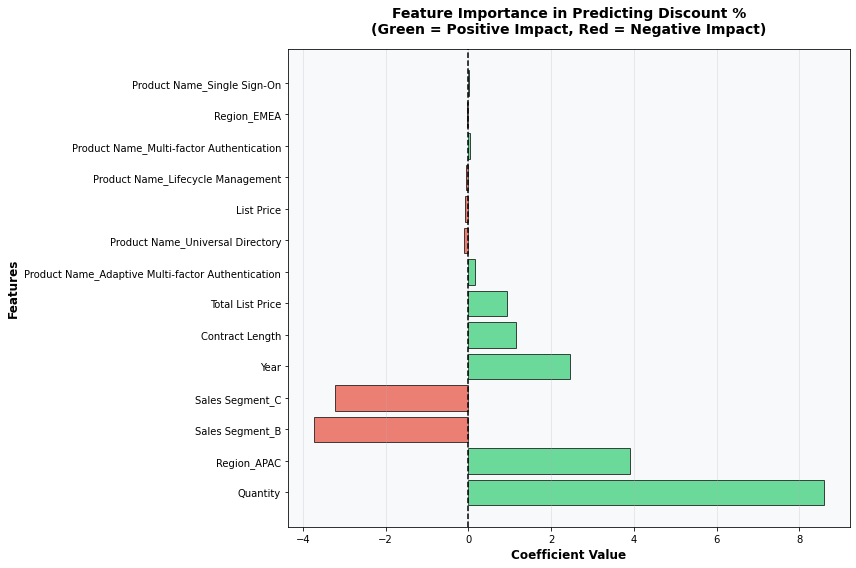

In [109]:
# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n" + "="*80)
print("FEATURE IMPORTANCE (Coefficients)")
print("="*80)
print(feature_importance.to_string(index=False))

# Visualize feature importance
plt.figure(figsize=(12, 8))
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in feature_importance['Coefficient']]
bars = plt.barh(range(len(feature_importance)), feature_importance['Coefficient'], 
                color=colors, alpha=0.7, edgecolor='black', linewidth=1)

plt.yticks(range(len(feature_importance)), feature_importance['Feature'], fontsize=10)
plt.xlabel('Coefficient Value', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Feature Importance in Predicting Discount %\n(Green = Positive Impact, Red = Negative Impact)', 
          fontsize=14, fontweight='bold', pad=15)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
plt.grid(True, alpha=0.3, axis='x')
plt.gca().set_facecolor('#f8f9fa')
plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
plt.show()


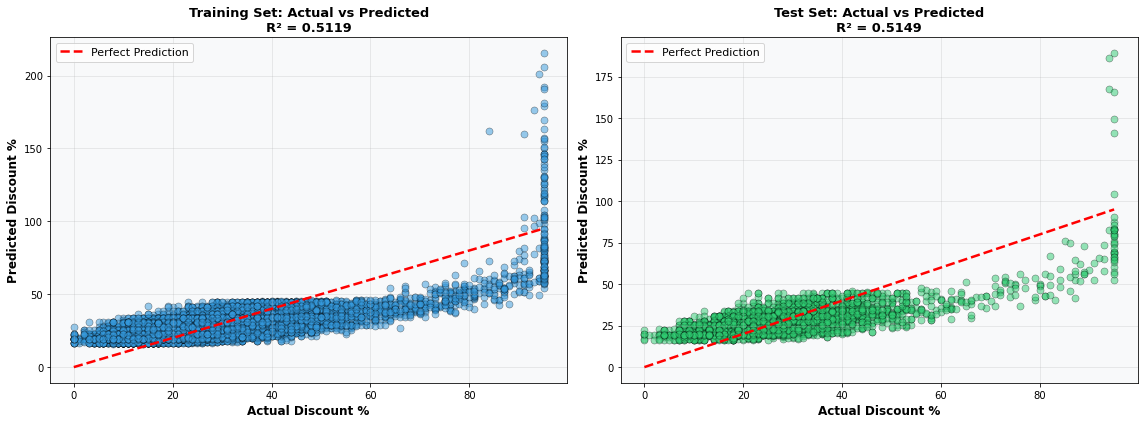

In [110]:
# Visualize Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Training Set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=50, color='#3498db', edgecolors='black', linewidth=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
            'r--', linewidth=2.5, label='Perfect Prediction')
axes[0].set_xlabel('Actual Discount %', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Predicted Discount %', fontsize=12, fontweight='bold')
axes[0].set_title(f'Training Set: Actual vs Predicted\nR² = {train_r2:.4f}', 
                 fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_facecolor('#f8f9fa')

# Plot 2: Test Set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=50, color='#2ecc71', edgecolors='black', linewidth=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
            'r--', linewidth=2.5, label='Perfect Prediction')
axes[1].set_xlabel('Actual Discount %', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Predicted Discount %', fontsize=12, fontweight='bold')
axes[1].set_title(f'Test Set: Actual vs Predicted\nR² = {test_r2:.4f}', 
                 fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_facecolor('#f8f9fa')

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()


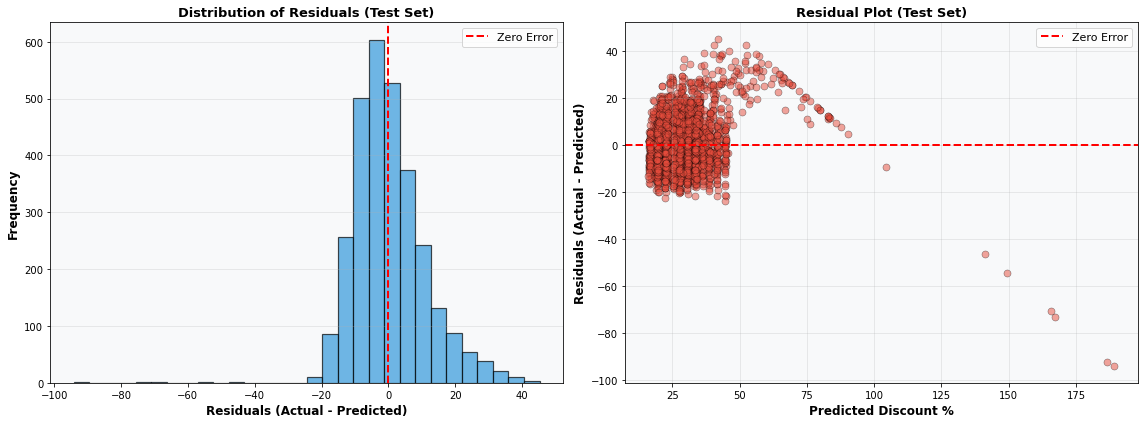


Residual Statistics (Test Set):
Mean Residual: 0.2580%
Std Dev of Residuals: 10.9423%


In [111]:
# Residual Analysis
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Residual Distribution
axes[0].hist(residuals_test, bins=30, color='#3498db', alpha=0.7, edgecolor='black', linewidth=1.2)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0].set_xlabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Residuals (Test Set)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_facecolor('#f8f9fa')

# Plot 2: Residuals vs Predicted
axes[1].scatter(y_test_pred, residuals_test, alpha=0.5, s=50, color='#e74c3c', 
               edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1].set_xlabel('Predicted Discount %', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[1].set_title('Residual Plot (Test Set)', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_facecolor('#f8f9fa')

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

print("\nResidual Statistics (Test Set):")
print(f"Mean Residual: {residuals_test.mean():.4f}%")
print(f"Std Dev of Residuals: {residuals_test.std():.4f}%")


### 3.5 Trying to fix bad resudials by removing outliers

In [113]:
# SOLUTION 1: Check for and handle outliers
print("Checking for outliers in target variable:")
print(deal_level_data['Discount_Percentage'].describe())

# First, check what columns are available
print("\nAvailable columns in deal_level_data:")
print(deal_level_data.columns.tolist())

# Identify extreme discounts
extreme_discounts = deal_level_data[
    (deal_level_data['Discount_Percentage'] < deal_level_data['Discount_Percentage'].quantile(0.01)) | 
    (deal_level_data['Discount_Percentage'] > deal_level_data['Discount_Percentage'].quantile(0.99))
]
print(f"\nNumber of extreme discount deals: {len(extreme_discounts)}")

# Show extreme discounts with available columns
if len(extreme_discounts) > 0:
    print("\nExtreme discount deals:")
    print(extreme_discounts[['Deal ID', 'Discount_Percentage', 'Quantity']].head(10))

# Option: Remove extreme outliers 
deal_level_data_clean = deal_level_data[
    (deal_level_data['Discount_Percentage'] >= deal_level_data['Discount_Percentage'].quantile(0.01)) & 
    (deal_level_data['Discount_Percentage'] <= deal_level_data['Discount_Percentage'].quantile(0.99))
].copy()

print(f"\nOriginal dataset size: {len(deal_level_data)}")
print(f"Cleaned dataset size: {len(deal_level_data_clean)}")


Checking for outliers in target variable:
count    14769.000000
mean        29.407407
std         15.671019
min          0.000000
25%         19.000000
50%         27.000000
75%         36.000000
max         95.000000
Name: Discount_Percentage, dtype: float64

Available columns in deal_level_data:
['Deal ID', 'Year', 'Region', 'Sales Segment', 'Contract Length', 'Discount_Percentage', 'Quantity', 'List Price', 'Total List Price', 'Product Name_Adaptive Multi-factor Authentication', 'Product Name_Lifecycle Management', 'Product Name_Multi-factor Authentication', 'Product Name_Single Sign-On', 'Product Name_Universal Directory']

Number of extreme discount deals: 128

Extreme discount deals:
               Deal ID  Discount_Percentage  Quantity
402   0Z3XFEUCQGUTD7O0                  4.0     500.0
416   118QFSH1XQISP0CQ                  3.0     500.0
674   1PUUDMQUGYLQGZ4S                  2.0     500.0
731   1TTMQP6WXUON6GU1                  0.0     500.0
928   2BT5XIIWEJLLJ4NS         

In [114]:
# Build Linear Regression Model with outlier-removed dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Prepare features and target using cleaned data
deal_model_data_clean = deal_level_data_clean.copy()

# Create dummy variables for Region and Sales Segment
deal_model_data_clean = pd.get_dummies(deal_model_data_clean, columns=['Region', 'Sales Segment'], 
                                        drop_first=True, dtype=int)

# Select features for the model (exclude Deal ID, Discount_Percentage, and ARR)
feature_columns = [col for col in deal_model_data_clean.columns 
                  if col not in ['Deal ID', 'Discount_Percentage', 'ARR']]

X = deal_model_data_clean[feature_columns]
y = deal_model_data_clean['Discount_Percentage']

print("Features used in the cleaned model:")
print(feature_columns)
print(f"\nFeature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")


Features used in the cleaned model:
['Year', 'Contract Length', 'Quantity', 'List Price', 'Total List Price', 'Product Name_Adaptive Multi-factor Authentication', 'Product Name_Lifecycle Management', 'Product Name_Multi-factor Authentication', 'Product Name_Single Sign-On', 'Product Name_Universal Directory', 'Region_APAC', 'Region_EMEA', 'Sales Segment_B', 'Sales Segment_C']

Feature matrix shape: (14641, 14)
Target variable shape: (14641,)


In [115]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Scale features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
lr_model_clean = LinearRegression()
lr_model_clean.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = lr_model_clean.predict(X_train_scaled)
y_test_pred = lr_model_clean.predict(X_test_scaled)

# Evaluate model performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\n" + "="*80)
print("MODEL PERFORMANCE METRICS (OUTLIERS REMOVED)")
print("="*80)
print(f"\nTraining Set:")
print(f"  R² Score: {train_r2:.4f}")
print(f"  RMSE: {train_rmse:.4f}%")
print(f"  MAE: {train_mae:.4f}%")

print(f"\nTest Set:")
print(f"  R² Score: {test_r2:.4f}")
print(f"  RMSE: {test_rmse:.4f}%")
print(f"  MAE: {test_mae:.4f}%")

print(f"\nModel Intercept: {lr_model_clean.intercept_:.4f}")


Training set size: 11712
Test set size: 2929

MODEL PERFORMANCE METRICS (OUTLIERS REMOVED)

Training Set:
  R² Score: 0.5117
  RMSE: 10.8374%
  MAE: 8.0919%

Test Set:
  R² Score: 0.5062
  RMSE: 10.9776%
  MAE: 8.1641%

Model Intercept: 29.5621



FEATURE IMPORTANCE (Coefficients) - CLEANED DATA
                                          Feature  Coefficient
                                         Quantity     9.182292
                                      Region_APAC     3.828207
                                  Sales Segment_B    -3.533438
                                  Sales Segment_C    -3.127836
                                             Year     2.322695
                                  Contract Length     1.288872
                                 Total List Price     0.238837
                 Product Name_Universal Directory    -0.124238
                                      Region_EMEA    -0.113554
                                       List Price    -0.102879
                Product Name_Lifecycle Management     0.071021
Product Name_Adaptive Multi-factor Authentication     0.066213
         Product Name_Multi-factor Authentication    -0.040229
                      Product Name_Single Sign-On     0.003176


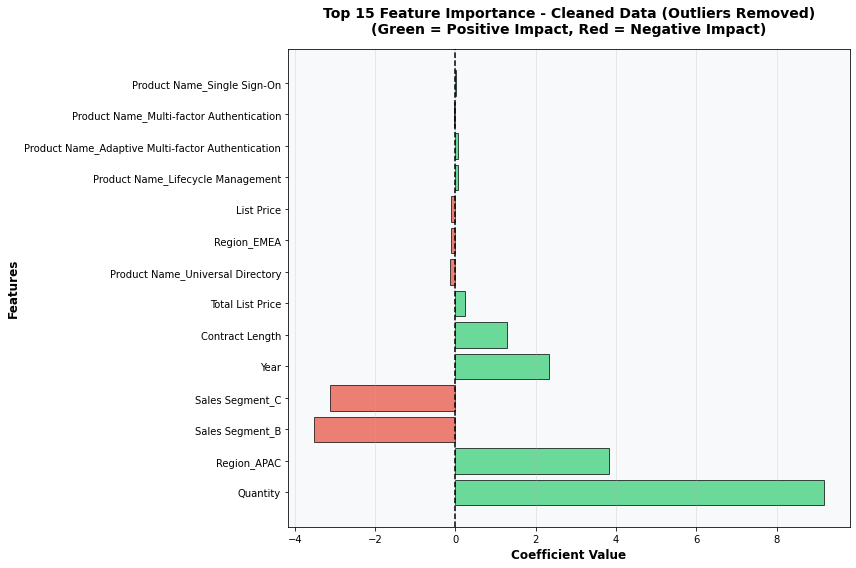

In [116]:
# Feature Importance Analysis
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_model_clean.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\n" + "="*80)
print("FEATURE IMPORTANCE (Coefficients) - CLEANED DATA")
print("="*80)
print(feature_importance.head(20).to_string(index=False))

# Visualize top 15 feature importance
top_features = feature_importance.head(15)

plt.figure(figsize=(12, 8))
colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in top_features['Coefficient']]
bars = plt.barh(range(len(top_features)), top_features['Coefficient'], 
                color=colors, alpha=0.7, edgecolor='black', linewidth=1)

plt.yticks(range(len(top_features)), top_features['Feature'], fontsize=10)
plt.xlabel('Coefficient Value', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 15 Feature Importance - Cleaned Data (Outliers Removed)\n(Green = Positive Impact, Red = Negative Impact)', 
          fontsize=14, fontweight='bold', pad=15)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
plt.grid(True, alpha=0.3, axis='x')
plt.gca().set_facecolor('#f8f9fa')
plt.gcf().patch.set_facecolor('white')
plt.tight_layout()
plt.show()


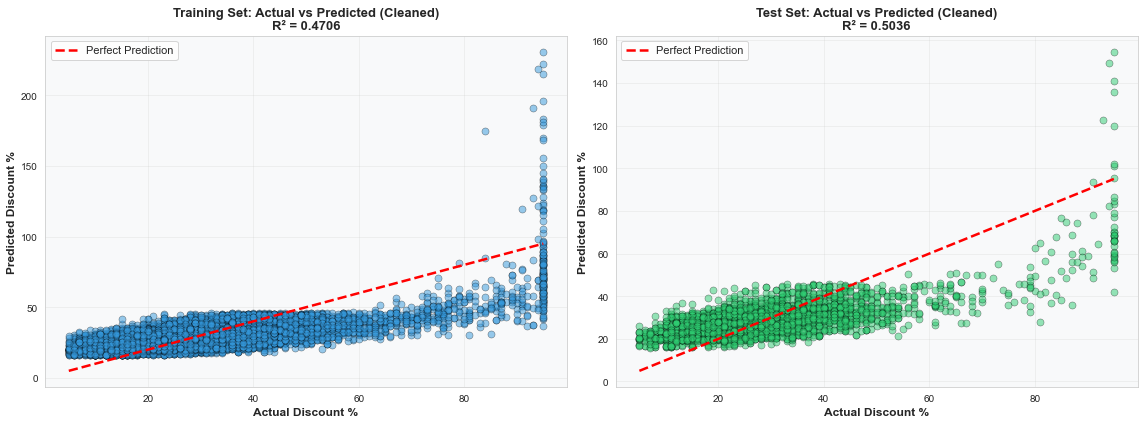

In [74]:
# Visualize Actual vs Predicted - Cleaned Model
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Training Set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=50, color='#3498db', edgecolors='black', linewidth=0.5)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
            'r--', linewidth=2.5, label='Perfect Prediction')
axes[0].set_xlabel('Actual Discount %', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Predicted Discount %', fontsize=12, fontweight='bold')
axes[0].set_title(f'Training Set: Actual vs Predicted (Cleaned)\nR² = {train_r2:.4f}', 
                 fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)
axes[0].set_facecolor('#f8f9fa')

# Plot 2: Test Set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=50, color='#2ecc71', edgecolors='black', linewidth=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
            'r--', linewidth=2.5, label='Perfect Prediction')
axes[1].set_xlabel('Actual Discount %', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Predicted Discount %', fontsize=12, fontweight='bold')
axes[1].set_title(f'Test Set: Actual vs Predicted (Cleaned)\nR² = {test_r2:.4f}', 
                 fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_facecolor('#f8f9fa')

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()


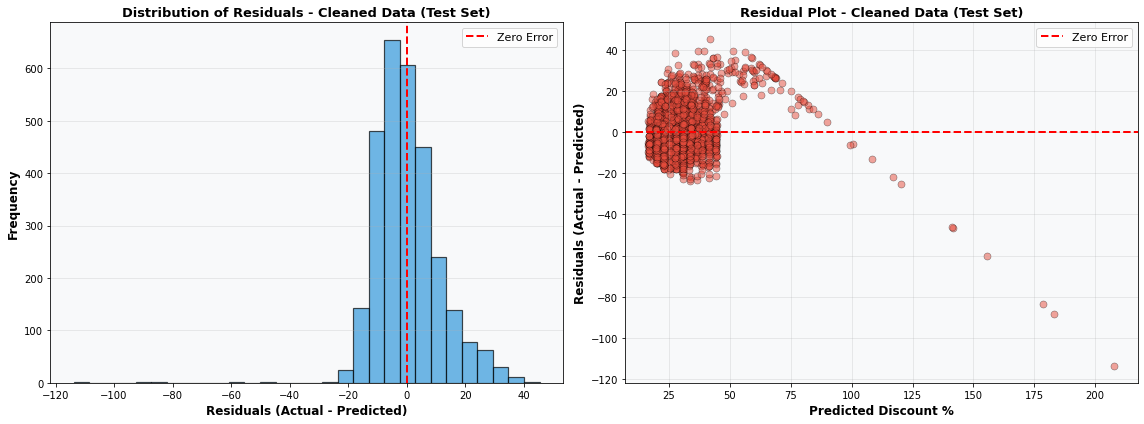


Residual Statistics - Cleaned Data (Test Set):
Mean Residual: 0.2125%
Std Dev of Residuals: 10.9774%
Min Residual: -113.8289%
Max Residual: 45.3198%


In [117]:
# Residual Analysis - Cleaned Model
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Residual Distribution
axes[0].hist(residuals_test, bins=30, color='#3498db', alpha=0.7, edgecolor='black', linewidth=1.2)
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0].set_xlabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Residuals - Cleaned Data (Test Set)', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_facecolor('#f8f9fa')

# Plot 2: Residuals vs Predicted
axes[1].scatter(y_test_pred, residuals_test, alpha=0.5, s=50, color='#e74c3c', 
               edgecolors='black', linewidth=0.5)
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1].set_xlabel('Predicted Discount %', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Residuals (Actual - Predicted)', fontsize=12, fontweight='bold')
axes[1].set_title('Residual Plot - Cleaned Data (Test Set)', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)
axes[1].set_facecolor('#f8f9fa')

fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

print("\nResidual Statistics - Cleaned Data (Test Set):")
print(f"Mean Residual: {residuals_test.mean():.4f}%")
print(f"Std Dev of Residuals: {residuals_test.std():.4f}%")
print(f"Min Residual: {residuals_test.min():.4f}%")
print(f"Max Residual: {residuals_test.max():.4f}%")


## 4. Analytical Model

In [140]:
#Use predictions from cleaned model to project revenue on deal aggregated data
#deal model data is model transformed data
projected_data=deal_model_data.copy()
X = projected_data[feature_columns]

# Scale features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Make predictions
y_pred = lr_model_clean.predict(X_scaled)
projected_data['Predicted_Discount']=np.minimum(y_pred,95) #Max discount capped at 95%

#Calculate ARR and Projected ARR from current discount and predicted discount
projected_data['ARR']=projected_data['Total List Price']*(100-projected_data['Discount_Percentage'])*12/(projected_data['Contract Length']*100)
projected_data['Projected ARR']=projected_data['Total List Price']*(100-projected_data['Predicted_Discount'])*12/(projected_data['Contract Length']*100)

filter_col=['Deal ID','Year','Contract Length','Quantity','Total List Price','Discount_Percentage','Predicted_Discount','ARR','Projected ARR']
filtered_data=projected_data[filter_col]
filtered_data.head()


,Deal ID,Year,Contract Length,Quantity,Total List Price,Discount_Percentage,Predicted_Discount,ARR,Projected ARR
0,0011LYHVAURRAGZP,2024,36,1000.0,396000,35.0,33.696061,85800.0,87521.199145
1,00163VHH30WYN4JY,2022,36,2500.0,720000,31.0,20.701829,165600.0,190315.609988
2,004YLID3WUAUI08F,2022,12,1000.0,96000,30.0,24.875727,67200.0,72119.302009
3,0094RE9EL8OIZ6ED,2022,36,500.0,198000,23.0,27.894078,50820.0,47589.908290
4,00ADHPCYR6S1PKDA,2024,36,500.0,90000,37.0,33.220649,18900.0,20033.805428


In [141]:
filtered_data[filtered_data['Discount_Bin']=='75%+']

KeyError: 'Discount_Bin'

Chart 1: ARR vs Projected ARR by Discount Bin


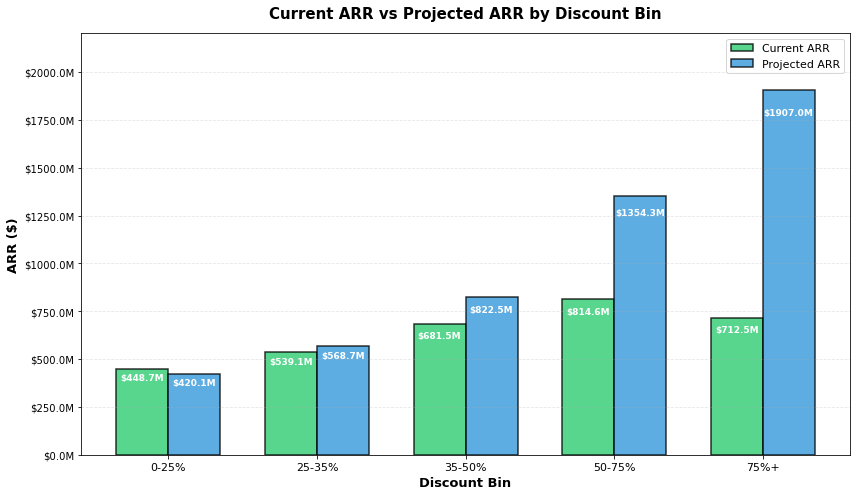


ARR Comparison by Discount Bin:
  Discount_Bin          ARR  Projected ARR  Total List Price
0        0-25%  448694100.0   4.200944e+08        1362738000
1       25-35%  539066640.0   5.686836e+08        1974012000
2       35-50%  681522780.0   8.225491e+08        3060486000
3       50-75%  814613460.0   1.354278e+09        5643420000
4         75%+  712536000.0   1.907036e+09       21315000000


Chart 2: ARR vs Projected ARR by Year


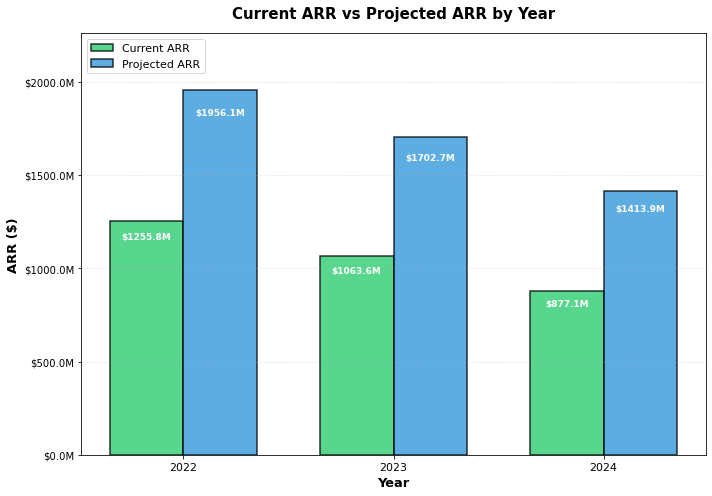


ARR Comparison by Year:
   Year           ARR  Projected ARR  Total List Price
0  2022  1.255797e+09   1.956090e+09       12555306000
1  2023  1.063583e+09   1.702683e+09       10911120000
2  2024  8.770529e+08   1.413868e+09        9889230000


Chart 3: ARR vs Projected ARR by Total List Price Bins


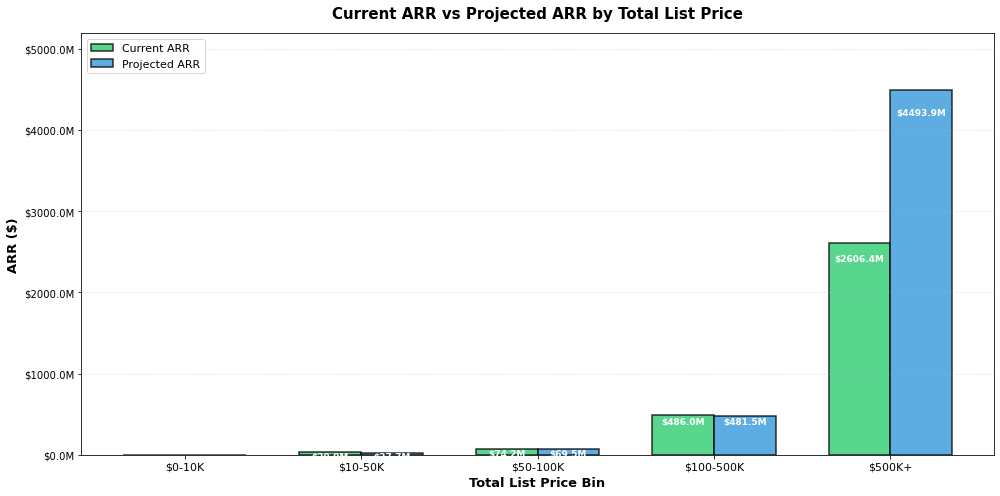


ARR Comparison by Total List Price:
  List_Price_Bin           ARR  Projected ARR  Num_Deals
0         $0-10K  0.000000e+00   0.000000e+00          0
1        $10-50K  2.987286e+07   2.771115e+07       1408
2       $50-100K  7.422240e+07   6.949914e+07       2172
3      $100-500K  4.859705e+08   4.815034e+08       6982
4         $500K+  2.606367e+09   4.493927e+09       4207


In [ ]:
# Add discount bins to filtered_data
filtered_data['Discount_Bin'] = pd.cut(filtered_data['Discount_Percentage'], 
                                       bins=[-float('inf'), 25, 35, 50, 75, float('inf')],
                                       labels=['0-25%', '25-35%', '35-50%', '50-75%', '75%+'])

# Chart 1: ARR vs Projected ARR by Discount Bin
print("Chart 1: ARR vs Projected ARR by Discount Bin")
print("="*80)

discount_bin_comparison = filtered_data.groupby('Discount_Bin').agg({
    'ARR': 'sum',
    'Projected ARR': 'sum',
    'Total List Price': 'sum'
}).reset_index()

fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(discount_bin_comparison))
width = 0.35

bars1 = ax.bar(x - width/2, discount_bin_comparison['ARR'], width, 
               label='Current ARR', color='#2ecc71', alpha=0.8, 
               edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, discount_bin_comparison['Projected ARR'], width, 
               label='Projected ARR', color='#3498db', alpha=0.8, 
               edgecolor='black', linewidth=1.5)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height * 0.95,
                f'${height/1e6:.1f}M',
                ha='center', va='top', fontsize=9, fontweight='bold', color='white')

ax.set_xlabel('Discount Bin', fontsize=13, fontweight='bold')
ax.set_ylabel('ARR ($)', fontsize=13, fontweight='bold')
ax.set_title('Current ARR vs Projected ARR by Discount Bin', fontsize=15, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(discount_bin_comparison['Discount_Bin'], fontsize=11)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
ax.legend(fontsize=11, loc='upper right')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, ax.get_ylim()[1] * 1.1)
plt.tight_layout()
plt.show()

print("\nARR Comparison by Discount Bin:")
print(discount_bin_comparison)


# Chart 2: ARR vs Projected ARR by Total List Price Bins
print("\n\nChart 3: ARR vs Projected ARR by Total List Price Bins")
print("="*80)

# Create bins for Total List Price
filtered_data['List_Price_Bin'] = pd.cut(filtered_data['Total List Price'], 
                                         bins=[0, 10000, 50000, 100000, 500000, float('inf')],
                                         labels=['$0-10K', '$10-50K', '$50-100K', '$100-500K', '$500K+'])

list_price_comparison = filtered_data.groupby('List_Price_Bin').agg({
    'ARR': 'sum',
    'Projected ARR': 'sum',
    'Deal ID': 'count'
}).reset_index()
list_price_comparison.columns = ['List_Price_Bin', 'ARR', 'Projected ARR', 'Num_Deals']

fig, ax = plt.subplots(figsize=(14, 7))
x = np.arange(len(list_price_comparison))
width = 0.35

bars1 = ax.bar(x - width/2, list_price_comparison['ARR'], width, 
               label='Current ARR', color='#2ecc71', alpha=0.8, 
               edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x + width/2, list_price_comparison['Projected ARR'], width, 
               label='Projected ARR', color='#3498db', alpha=0.8, 
               edgecolor='black', linewidth=1.5)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height * 0.95,
                f'${height/1e6:.1f}M',
                ha='center', va='top', fontsize=9, fontweight='bold', color='white')

ax.set_xlabel('Total List Price Bin', fontsize=13, fontweight='bold')
ax.set_ylabel('ARR ($)', fontsize=13, fontweight='bold')
ax.set_title('Current ARR vs Projected ARR by Total List Price', fontsize=15, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(list_price_comparison['List_Price_Bin'], fontsize=11)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
ax.legend(fontsize=11, loc='upper left')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_ylim(0, ax.get_ylim()[1] * 1.1)
plt.tight_layout()
plt.show()

print("\nARR Comparison by Total List Price:")
print(list_price_comparison)


Chart 1: Waterfall-Style Revenue Gain by Discount Bin


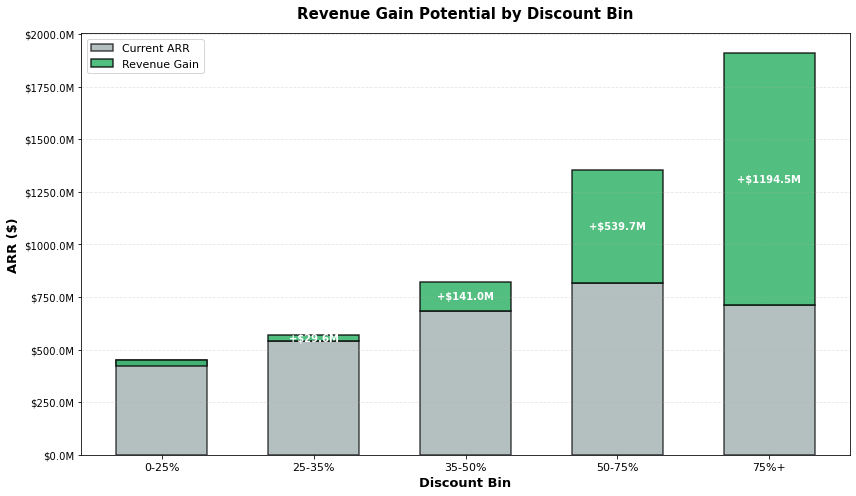



Chart 2: Revenue Gain Heatmap by Region and Year


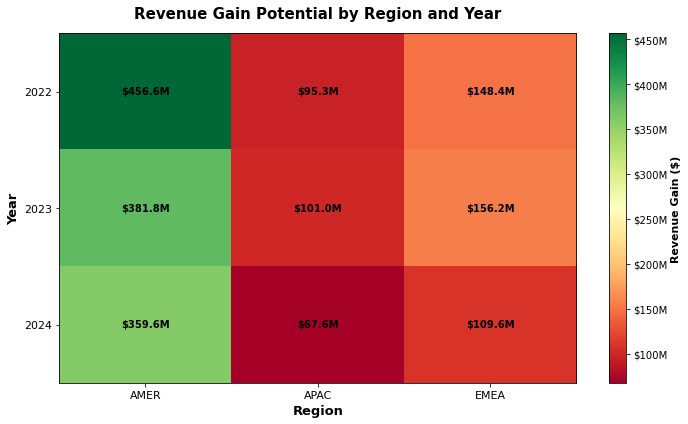



Chart 3: Revenue Gain % vs Current Discount %


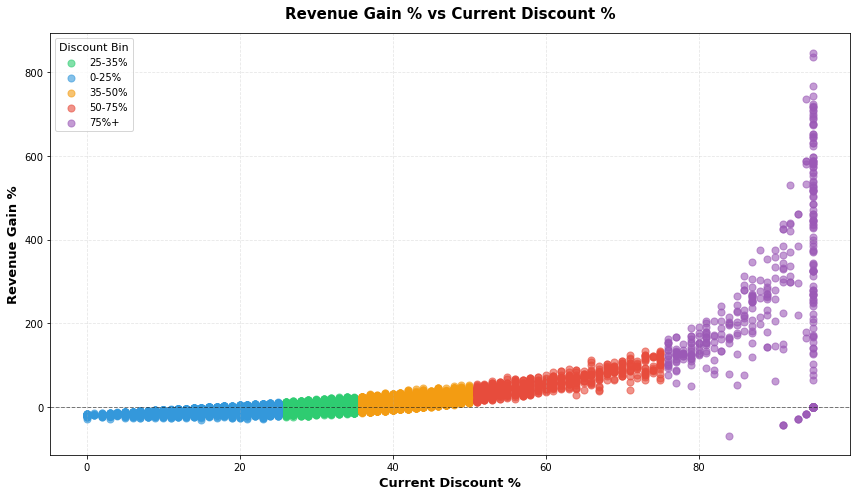



Chart 4: Top 10 Deals by Revenue Gain


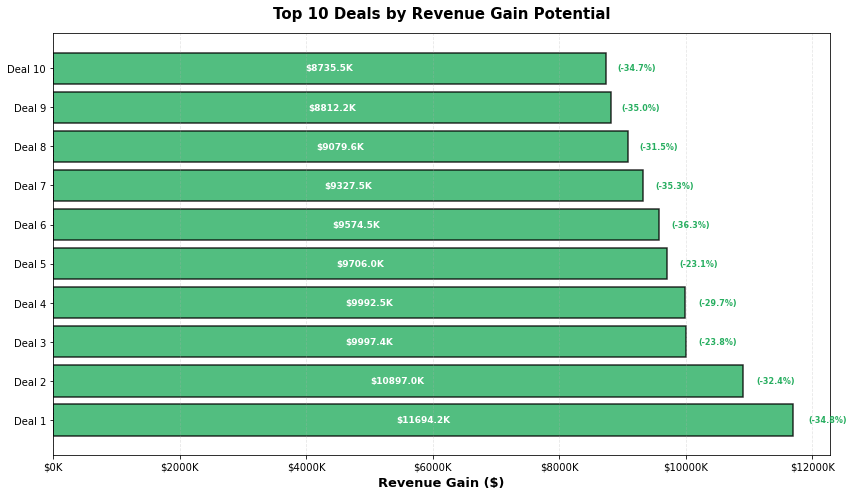


Top 10 Deals Details:
                Deal ID  Year  Discount_Percentage  Predicted_Discount  \
5556   DN1Y5RQ8I6B7827K  2022                 94.0           59.195911   
541    1D4KWVF04E42OADH  2022                 95.0           62.568373   
11542  SAPEKWWA3LVDQU05  2022                 88.0           64.196613   
6171   F696RH0NM4NPKN74  2022                 89.0           59.260278   
14711  ZVOKL6WXKV3UJ4GF  2023                 95.0           71.890526   
687    1QW29GCV3RFKSS1O  2022                 95.0           58.732974   
12313  U3AZXQABYPMZMAJW  2022                 94.0           58.668607   
14035  Y72ERPY94ZHM0N1A  2023                 89.0           57.473506   
7352   I5EN748ZWRT89MEN  2022                 95.0           60.030771   
12205  TUIUI8WBEII2NT7Y  2023                 87.0           52.335247   

             ARR  Revenue_Gain  
5556   2016000.0  1.169417e+07  
541    1680000.0  1.089703e+07  
11542  5040000.0  9.997422e+06  
6171   3696000.0  9.992547e+06

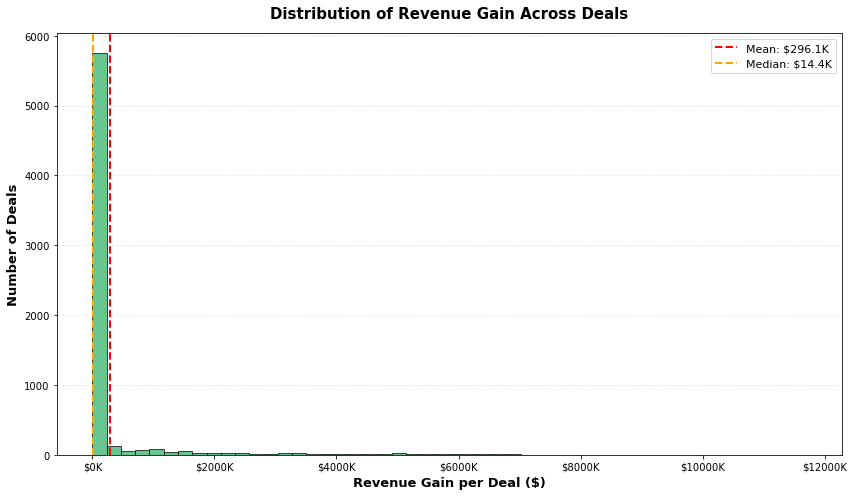


Total Revenue Gain Potential: $1876.21M
Average Revenue Gain per Deal: $127.0K
Deals with Positive Gain: 6528 (44.2%)


In [143]:
# Calculate revenue gain
filtered_data['Revenue_Gain'] = filtered_data['Projected ARR'] - filtered_data['ARR']
filtered_data['Revenue_Gain_Pct'] = (filtered_data['Revenue_Gain'] / filtered_data['ARR']) * 100

# Chart 1: Waterfall Chart - Revenue Gain by Discount Bin
print("Chart 1: Waterfall-Style Revenue Gain by Discount Bin")
print("="*80)

revenue_gain_by_bin = filtered_data.groupby('Discount_Bin').agg({
    'ARR': 'sum',
    'Revenue_Gain': 'sum'
}).reset_index()

fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(revenue_gain_by_bin))

# Plot current ARR as base
ax.bar(x, revenue_gain_by_bin['ARR'], width=0.6, label='Current ARR', 
       color='#95a5a6', alpha=0.7, edgecolor='black', linewidth=1.5)

# Stack revenue gain on top
ax.bar(x, revenue_gain_by_bin['Revenue_Gain'], width=0.6, 
       bottom=revenue_gain_by_bin['ARR'], label='Revenue Gain', 
       color='#27ae60', alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels for revenue gain
for i, (arr, gain) in enumerate(zip(revenue_gain_by_bin['ARR'], revenue_gain_by_bin['Revenue_Gain'])):
    if gain > 0:
        ax.text(i, arr + gain/2, f'+${gain/1e6:.1f}M', 
                ha='center', va='center', fontsize=10, fontweight='bold', color='white')

ax.set_xlabel('Discount Bin', fontsize=13, fontweight='bold')
ax.set_ylabel('ARR ($)', fontsize=13, fontweight='bold')
ax.set_title('Revenue Gain Potential by Discount Bin', fontsize=15, fontweight='bold', pad=15)
ax.set_xticks(x)
ax.set_xticklabels(revenue_gain_by_bin['Discount_Bin'], fontsize=11)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
ax.legend(fontsize=11, loc='upper left')
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


# Chart 2: Revenue Gain by Region and Year (Heatmap)
print("\n\nChart 2: Revenue Gain Heatmap by Region and Year")
print("="*80)

# Need to merge region info back
filtered_data_with_region = filtered_data.merge(
    data[['Deal ID', 'Region']].drop_duplicates(), 
    on='Deal ID', how='left'
)

revenue_gain_heatmap = filtered_data_with_region.groupby(['Year', 'Region'])['Revenue_Gain'].sum().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(revenue_gain_heatmap.values, cmap='RdYlGn', aspect='auto')

# Set ticks and labels
ax.set_xticks(np.arange(len(revenue_gain_heatmap.columns)))
ax.set_yticks(np.arange(len(revenue_gain_heatmap.index)))
ax.set_xticklabels(revenue_gain_heatmap.columns, fontsize=11)
ax.set_yticklabels(revenue_gain_heatmap.index.astype(int), fontsize=11)

# Add value annotations
for i in range(len(revenue_gain_heatmap.index)):
    for j in range(len(revenue_gain_heatmap.columns)):
        value = revenue_gain_heatmap.values[i, j]
        text = ax.text(j, i, f'${value/1e6:.1f}M',
                      ha="center", va="center", color="black", fontsize=10, fontweight='bold')

ax.set_xlabel('Region', fontsize=13, fontweight='bold')
ax.set_ylabel('Year', fontsize=13, fontweight='bold')
ax.set_title('Revenue Gain Potential by Region and Year', fontsize=15, fontweight='bold', pad=15)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Revenue Gain ($)', fontsize=11, fontweight='bold')
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))

plt.tight_layout()
plt.show()


# Chart 3: Scatter Plot - Revenue Gain % vs Current Discount %
print("\n\nChart 3: Revenue Gain % vs Current Discount %")
print("="*80)

fig, ax = plt.subplots(figsize=(12, 7))

# Create scatter plot with color by discount bin
colors_map = {'0-25%': '#3498db', '25-35%': '#2ecc71', '35-50%': '#f39c12', 
              '50-75%': '#e74c3c', '75%+': '#9b59b6'}

for bin_name in filtered_data['Discount_Bin'].unique():
    bin_data = filtered_data[filtered_data['Discount_Bin'] == bin_name]
    ax.scatter(bin_data['Discount_Percentage'], bin_data['Revenue_Gain_Pct'],
               alpha=0.6, s=50, label=bin_name, color=colors_map[bin_name])

ax.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.set_xlabel('Current Discount %', fontsize=13, fontweight='bold')
ax.set_ylabel('Revenue Gain %', fontsize=13, fontweight='bold')
ax.set_title('Revenue Gain % vs Current Discount %', fontsize=15, fontweight='bold', pad=15)
ax.legend(title='Discount Bin', fontsize=10, title_fontsize=11, loc='best')
ax.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


# Chart 4: Top/Bottom Performers - Deals with Highest Revenue Gain
print("\n\nChart 4: Top 10 Deals by Revenue Gain")
print("="*80)

top_10_deals = filtered_data.nlargest(10, 'Revenue_Gain')[['Deal ID', 'Year', 'Discount_Percentage', 
                                                             'Predicted_Discount', 'ARR', 'Revenue_Gain']]

fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(top_10_deals))

bars = ax.barh(x, top_10_deals['Revenue_Gain'], color='#27ae60', 
               alpha=0.8, edgecolor='black', linewidth=1.5)

# Add value labels
for i, (idx, row) in enumerate(top_10_deals.iterrows()):
    ax.text(row['Revenue_Gain'] * 0.5, i, f'${row["Revenue_Gain"]/1e3:.1f}K',
            ha='center', va='center', fontsize=9, fontweight='bold', color='white')
    # Add discount improvement info
    discount_improvement = row['Discount_Percentage'] - row['Predicted_Discount']
    ax.text(row['Revenue_Gain'] * 1.02, i, f'(-{discount_improvement:.1f}%)',
            ha='left', va='center', fontsize=8, color='#27ae60', fontweight='bold')

ax.set_yticks(x)
ax.set_yticklabels([f"Deal {i+1}" for i in range(len(top_10_deals))], fontsize=10)
ax.set_xlabel('Revenue Gain ($)', fontsize=13, fontweight='bold')
ax.set_title('Top 10 Deals by Revenue Gain Potential', fontsize=15, fontweight='bold', pad=15)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e3:.0f}K'))
ax.grid(axis='x', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("\nTop 10 Deals Details:")
print(top_10_deals)


# Chart 5: Revenue Gain Distribution (Histogram)
print("\n\nChart 5: Revenue Gain Distribution")
print("="*80)

fig, ax = plt.subplots(figsize=(12, 7))

# Only show deals with positive revenue gain
positive_gains = filtered_data[filtered_data['Revenue_Gain'] > 0]['Revenue_Gain']

ax.hist(positive_gains, bins=50, color='#27ae60', alpha=0.7, edgecolor='black', linewidth=1)
ax.axvline(positive_gains.mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: ${positive_gains.mean()/1e3:.1f}K')
ax.axvline(positive_gains.median(), color='orange', linestyle='--', linewidth=2, 
           label=f'Median: ${positive_gains.median()/1e3:.1f}K')

ax.set_xlabel('Revenue Gain per Deal ($)', fontsize=13, fontweight='bold')
ax.set_ylabel('Number of Deals', fontsize=13, fontweight='bold')
ax.set_title('Distribution of Revenue Gain Across Deals', fontsize=15, fontweight='bold', pad=15)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e3:.0f}K'))
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print(f"\nTotal Revenue Gain Potential: ${filtered_data['Revenue_Gain'].sum()/1e6:.2f}M")
print(f"Average Revenue Gain per Deal: ${filtered_data['Revenue_Gain'].mean()/1e3:.1f}K")
print(f"Deals with Positive Gain: {len(filtered_data[filtered_data['Revenue_Gain'] > 0])} ({len(filtered_data[filtered_data['Revenue_Gain'] > 0])/len(filtered_data)*100:.1f}%)")
